<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 160px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 5px;
        font-weight: 600;
        color: #222;
    }
    .member-list {
        display: grid;
        grid-template-columns: repeat(2, auto);
        gap: 6px 40px;
        font-size: 17px;
        color: #444;
    }
    .member {
        position: relative;
        padding-left: 20px;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Cars 4 You: Expediting Car Evaluations with ML</h1>
            <h2>Group 37 - Part 1: Data Exploration & Preprocessing</h2>
            <div class="member-list">
                <div class="member">Filipa Pereira, 20240509</div>
                <div class="member">Gonçalo Silva, 20250354</div>
                <div class="member">Marta La Feria, 20211051 </div>
                <div class="member">Tomás Coroa, 20250394 </div>
            </div>
        </div>
    </div>
</header>

</body>
</html>

---
## Table of Contents

1. [Identifying Business Needs](#1-business)
2. [Setup & Data Loading](#2-setup)
3. [Data Exploration](#3-exploration)
4. [Data Cleaning](#4-cleaning)
5. [Missing Data Treatment](#5-missing)
6. [Outlier Detection](#6-outliers)
7. [Feature Engineering](#7-features)
8. [Encoding & Scaling](#8-encoding)
9. [Export Preprocessed Data](#9-export)

---

<a id='1-business'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>1 | Identifying Business Needs</b></span>
    </h1>
</div>

**Overview and main goals.**    
**Cars 4 You** is an online car resale company that buys vehicles from multiple brands and resells them for profit. Increasing demand has created long waiting lists for mechanic inspections, delaying purchases and driving customers to competitors. To address this, the company aims to develop a **predictive model that estimates car prices from user-provided information**, eliminating the need for prior inspection.    

This project focuses on building a reliable and interpretable regression model to predict car prices based on user inputs, streamlining the evaluation process through effective data exploration and preprocessing.

**Available Attributes:**

|       | **Attribute**      | **Description**                                                                  |
|-------|-------------------|---------------------------------------------------------------------------------|
| **0** | `carID`           | Unique identifier for each car                                                  |
| **1** | `Brand`           | The car's main brand (e.g. Ford, Toyota)                                        |
| **2** | `model`           | The car model                                                                   |
| **3** | `year`            | The year of registration of the car                                             |
| **4** | `transmission`    | Type of transmission (Manual, Automatic, Semi-Auto, Other)                      |
| **5** | `mileage`         | Total reported distance travelled by the car (in miles)                         |
| **6** | `fuelType`        | Type of fuel used (Diesel, Petrol, Hybrid, Electric)                            |
| **7** | `tax`             | Road tax applicable in 2020 (in £)                                              |
| **8** | `mpg`             | Average Miles per Gallon                                                        |
| **9** | `engineSize`      | Size of engine in liters                                                        |
| **10**| `paintQuality%`   | Mechanic's assessment of paint quality (0-100%)                                 |
| **11**| `previousOwners`  | Number of previous registered owners                                            |
| **12**| `hasDamage`       | Boolean indicating if the car is damaged                                        |
| **13**| `price`           | The car's price when purchased by Cars 4 You (in £) — **TARGET**               |

<a id='2-setup'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2 | Setup & Data Loading</b></span>
    </h1>
</div>

### 2.1 Import Libraries

In [126]:
# Standard Libraries
import random
import warnings
from math import ceil
from itertools import combinations
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Statistics
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

# Machine Learning
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import (
    OneHotEncoder, RobustScaler, MinMaxScaler, 
    PowerTransformer, StandardScaler, TargetEncoder
)
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE
from sklearn.feature_selection import VarianceThreshold

# Custom utilities
import utils

# Configuration
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.set_option("display.float_format", lambda x: f"{x:.2f}")

# Plot styling
plt.style.use("ggplot")
sns.set_theme(style="white")
%config InlineBackend.figure_format = 'retina'

# Reproducibility
RANDOM_STATE = 37
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

# Custom color palette
palette = sns.color_palette("YlOrBr", 10)

print("✅ Libraries loaded successfully")

✅ Libraries loaded successfully


### 2.2 Load Data

In [64]:
# Load training and test datasets
car_eval = pd.read_csv('./project_data/train.csv')
X_test = pd.read_csv('./project_data/test.csv')

# Load brand/model reference dictionary (from wheel-size API)
#run_cars_api_request() #lets keep this function commented because it takes 2 hours running due to the API limit
brand_model_dic = pd.read_csv('./project_data/brands_models.csv')

print(f"Training set: {car_eval.shape[0]:,} rows, {car_eval.shape[1]} columns")
print(f"Test set: {X_test.shape[0]:,} rows, {X_test.shape[1]} columns")
print(f"Brand/Model reference: {brand_model_dic.shape[0]:,} entries")

Training set: 75,973 rows, 14 columns
Test set: 32,567 rows, 13 columns
Brand/Model reference: 5,891 entries


<a id='3-exploration'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>3 | Data Exploration</b></span>
    </h1>
</div>

### 3.1 Data Overview

In [65]:
# Preview training data
car_eval.head()

carID   Brand      model    year  price transmission  mileage fuelType  \
0  69512      VW       Golf 2016.00  22290    Semi-Auto 28421.00   Petrol   
1  53000  Toyota      Yaris 2019.00  13790       Manual  4589.00   Petrol   
2   6366    Audi         Q2 2019.00  24990    Semi-Auto  3624.00   Petrol   
3  29021    Ford     FIESTA 2018.00  12500        anual  9102.00   Petrol   
4  10062     BMW   2 Series 2019.00  22995       Manual  1000.00   Petrol   

     tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
0    NaN 11.42        2.00          63.00            4.00       0.00  
1 145.00 47.90        1.50          50.00            1.00       0.00  
2 145.00 40.90        1.50          56.00            4.00       0.00  
3 145.00 65.70        1.00          50.00           -2.34       0.00  
4 145.00 42.80        1.50          97.00            3.00       0.00

In [66]:
# Data types and missing values
car_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [67]:
# Check for duplicates
utils.print_dup_info(car_eval, exclude_groups=[['carID'], ['price', 'carID']], name="Training Set")
utils.print_dup_info(X_test, exclude_groups=[['carID']], name="Test Set")

Total duplicates in Training Set: 0
Duplicates without carID in Training Set: 4
Duplicates without price and carID in Training Set: 11
Total duplicates in Test Set: 0
Duplicates without carID in Test Set: 0


In [68]:
# Remove duplicates (excluding carID and price from duplicate check)
car_eval = car_eval.drop_duplicates(
    subset=car_eval.columns.difference(['carID', 'price']).tolist(), 
    keep='last'
)
print(f"Training set after removing duplicates: {car_eval.shape[0]:,} rows")

# Set carID as index
car_eval = car_eval.set_index('carID')
X_test = X_test.set_index('carID')

Training set after removing duplicates: 75,962 rows


### 3.2 Descriptive Statistics

In [69]:
# Numeric variables - extended statistics with skewness and kurtosis
utils.describe_num_with_skew_kurtosis(car_eval)

count     mean      std       min      25%      50%  \
year           74471.00  2017.10     2.21   1970.00  2016.00  2017.00   
price          75962.00 16882.24  9737.28    450.00 10200.00 14699.00   
mileage        74500.00 23006.39 22130.27 -58540.57  7426.00 17303.00   
tax            68060.00   120.33    65.52    -91.12   125.00   145.00   
mpg            68038.00    55.15    16.50    -43.42    46.30    54.30   
engineSize     74446.00     1.66     0.57     -0.10     1.20     1.60   
paintQuality%  74438.00    64.59    21.02      1.64    47.00    65.00   
previousOwners 74412.00     1.99     1.47     -2.35     1.00     2.00   
hasDamage      74414.00     0.00     0.00      0.00     0.00     0.00   

                    75%       max  skew  kurtosis  
year            2019.00   2024.12 -1.85     11.80  
price          20950.00 159999.00  2.28     12.00  
mileage        32432.25 323000.00  1.55      5.23  
tax              145.00    580.00  0.05      3.56  
mpg               62.80    470.80  7.30    158.66  
engineSize         2.00      6.60  1.23      4.44  
paintQuality%     82.00    125.59 -0.01     -0.77  
previousOwners     3.00      6.26 -0.00     -0.85  
hasDamage          0.00      0.00  0.00      0.00

In [70]:
# Categorical variables
utils.describe_cats(car_eval)

count unique     top   freq top_freq_ratio
Brand         74441     72    Ford  14806           0.20
model         74445    735   Focus   6351           0.09
transmission  74440     40  Manual  38042           0.51
fuelType      74451     34  Petrol  37985           0.51

### 3.3 Data Visualizations

In [71]:
# Identify column types
num = car_eval.select_dtypes(include='number').columns
cat = car_eval.select_dtypes(exclude='number').columns

print(f"Numeric columns ({len(num)}): {list(num)}")
print(f"Categorical columns ({len(cat)}): {list(cat)}")

Numeric columns (9): ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage']
Categorical columns (4): ['Brand', 'model', 'transmission', 'fuelType']


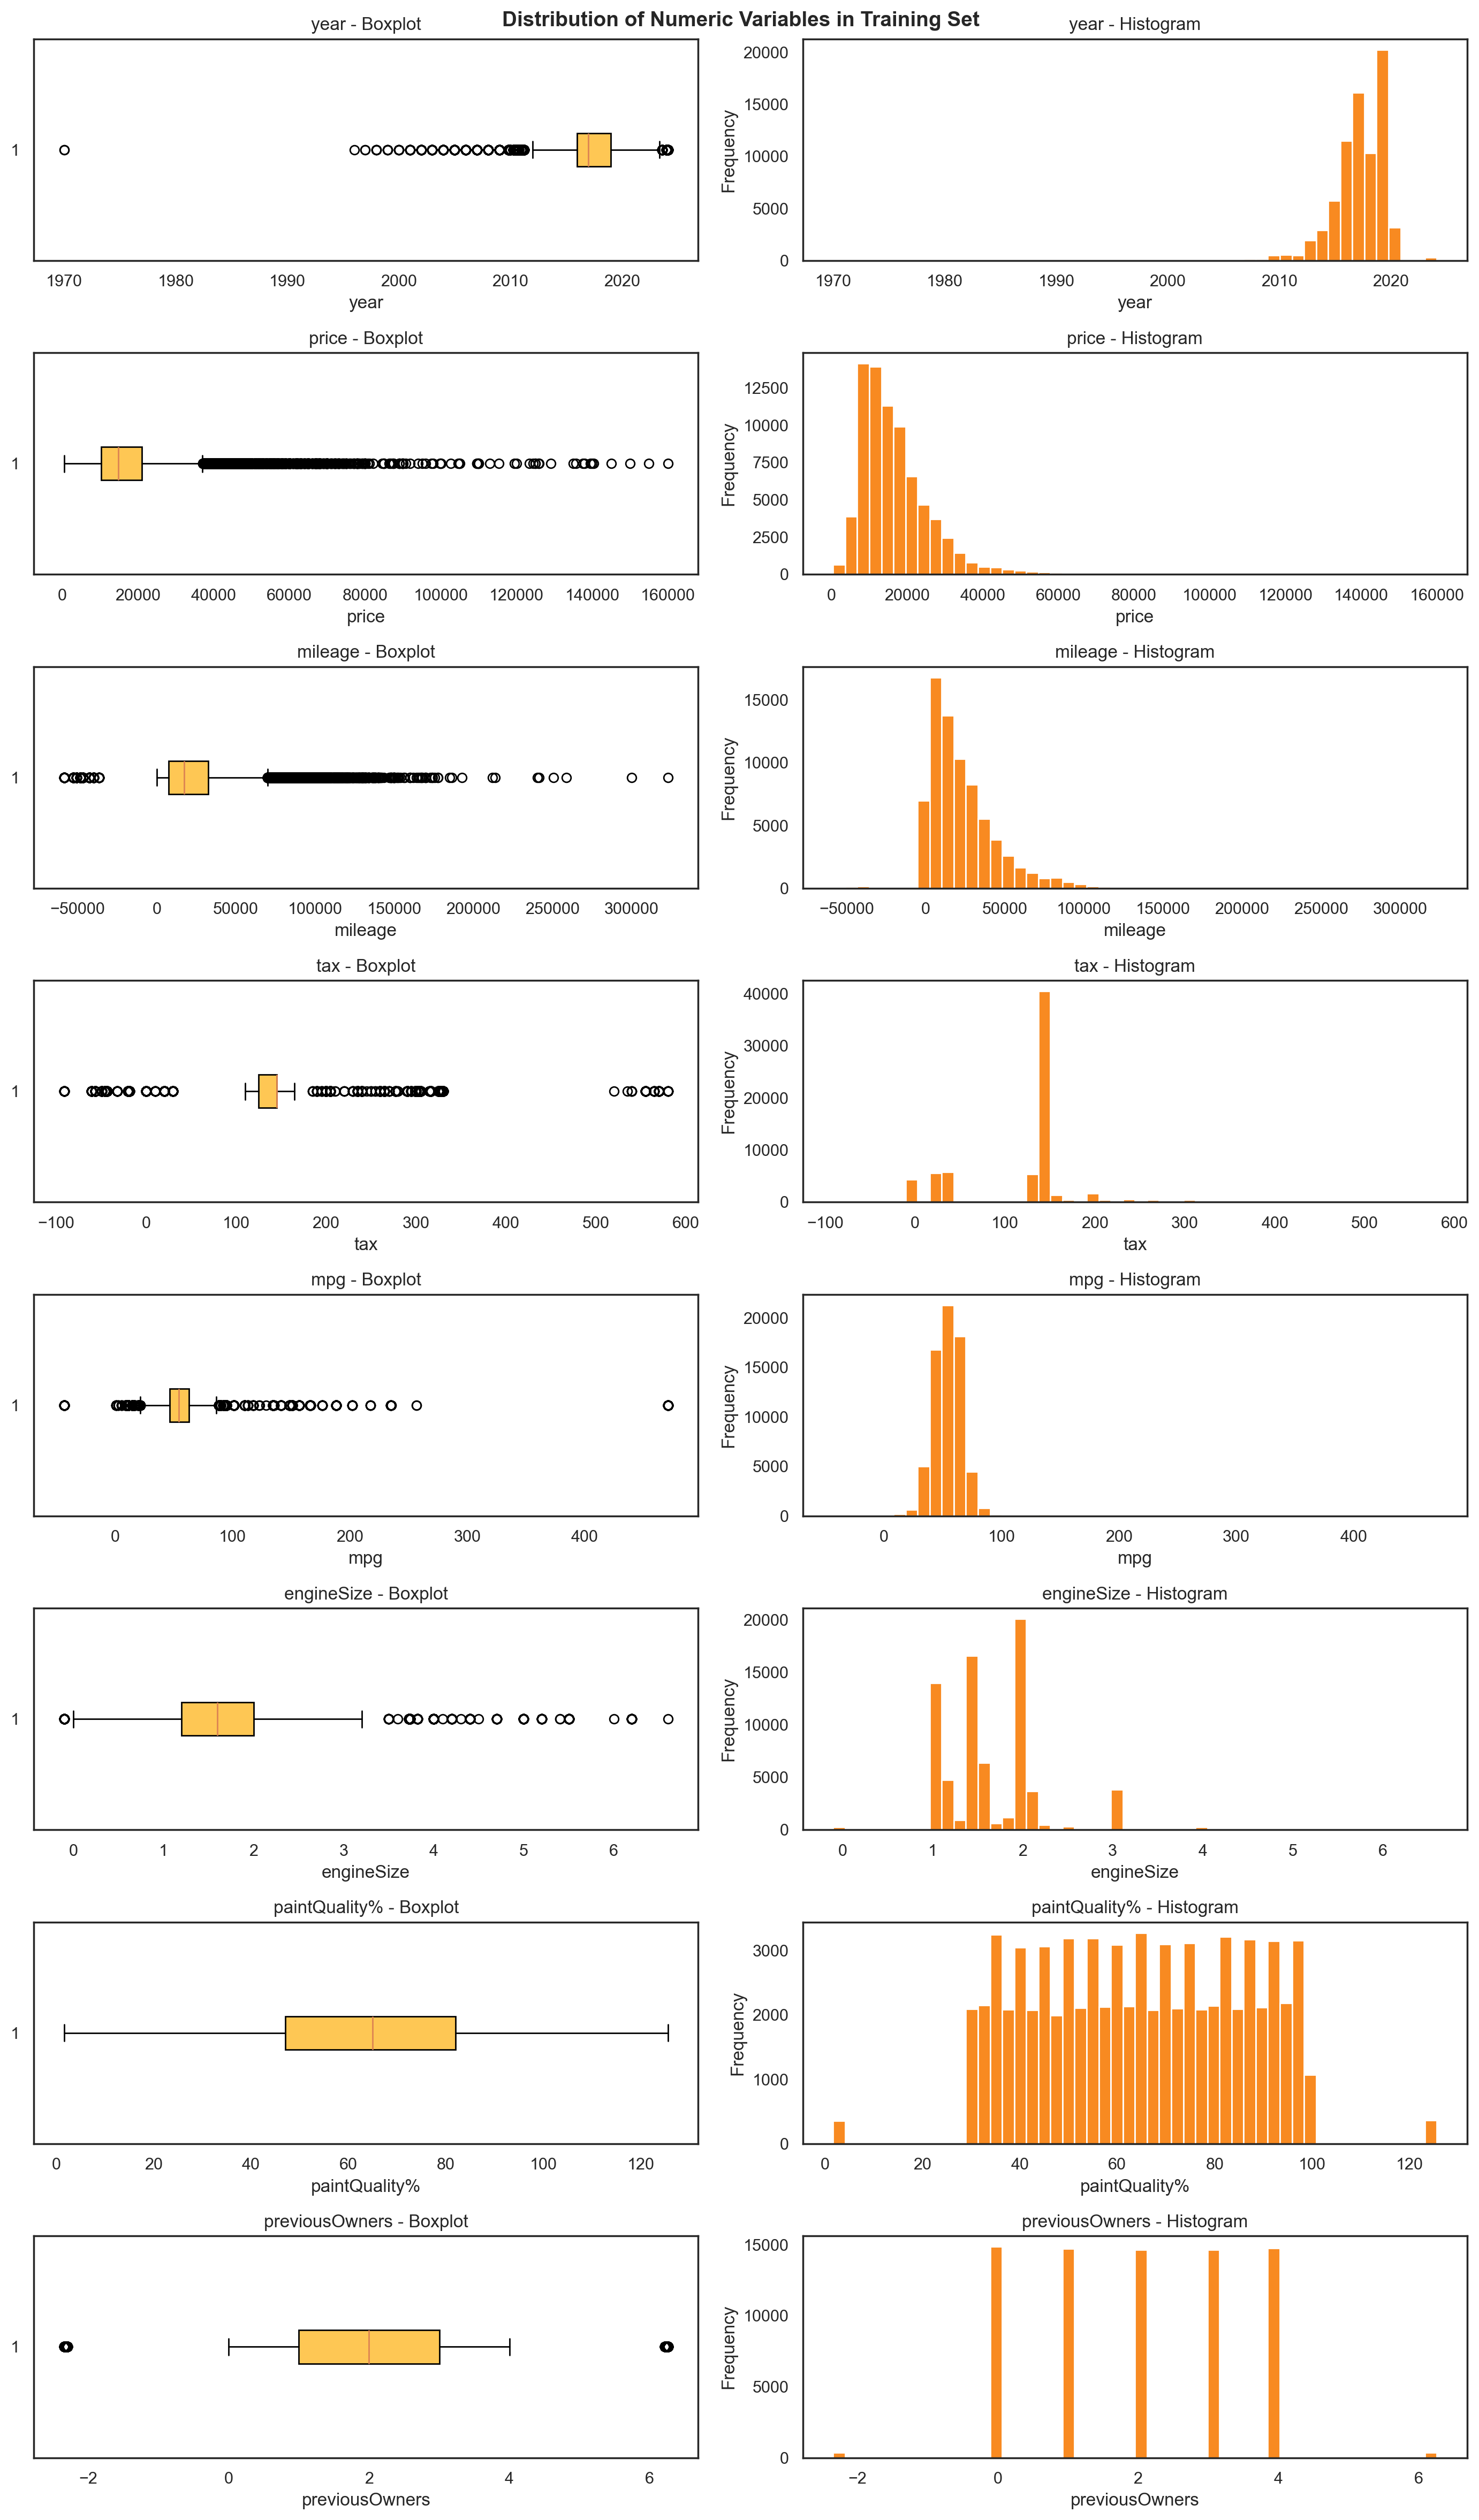

In [72]:
def plot_box_hist(df, cols, title, n_bins=50):
    """Plot boxplots and histograms for numeric variables."""
    n = len(cols)
    fig, axes = plt.subplots(n, 2, figsize=(14, 3*n))
    
    for i, col in enumerate(cols):
        # Boxplot
        axes[i, 0].boxplot(df[col].dropna(), vert=False, patch_artist=True,
                          boxprops=dict(facecolor=palette[3]))
        axes[i, 0].set_title(f'{col} - Boxplot')
        axes[i, 0].set_xlabel(col)
        
        # Histogram
        axes[i, 1].hist(df[col].dropna(), bins=n_bins, color=palette[5], edgecolor='white')
        axes[i, 1].set_title(f'{col} - Histogram')
        axes[i, 1].set_xlabel(col)
        axes[i, 1].set_ylabel('Frequency')
    
    plt.suptitle(f'Distribution of Numeric Variables {title}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Plot numeric distributions (excluding binary variables)
plot_box_hist(car_eval, num.drop(['hasDamage']), "in Training Set")

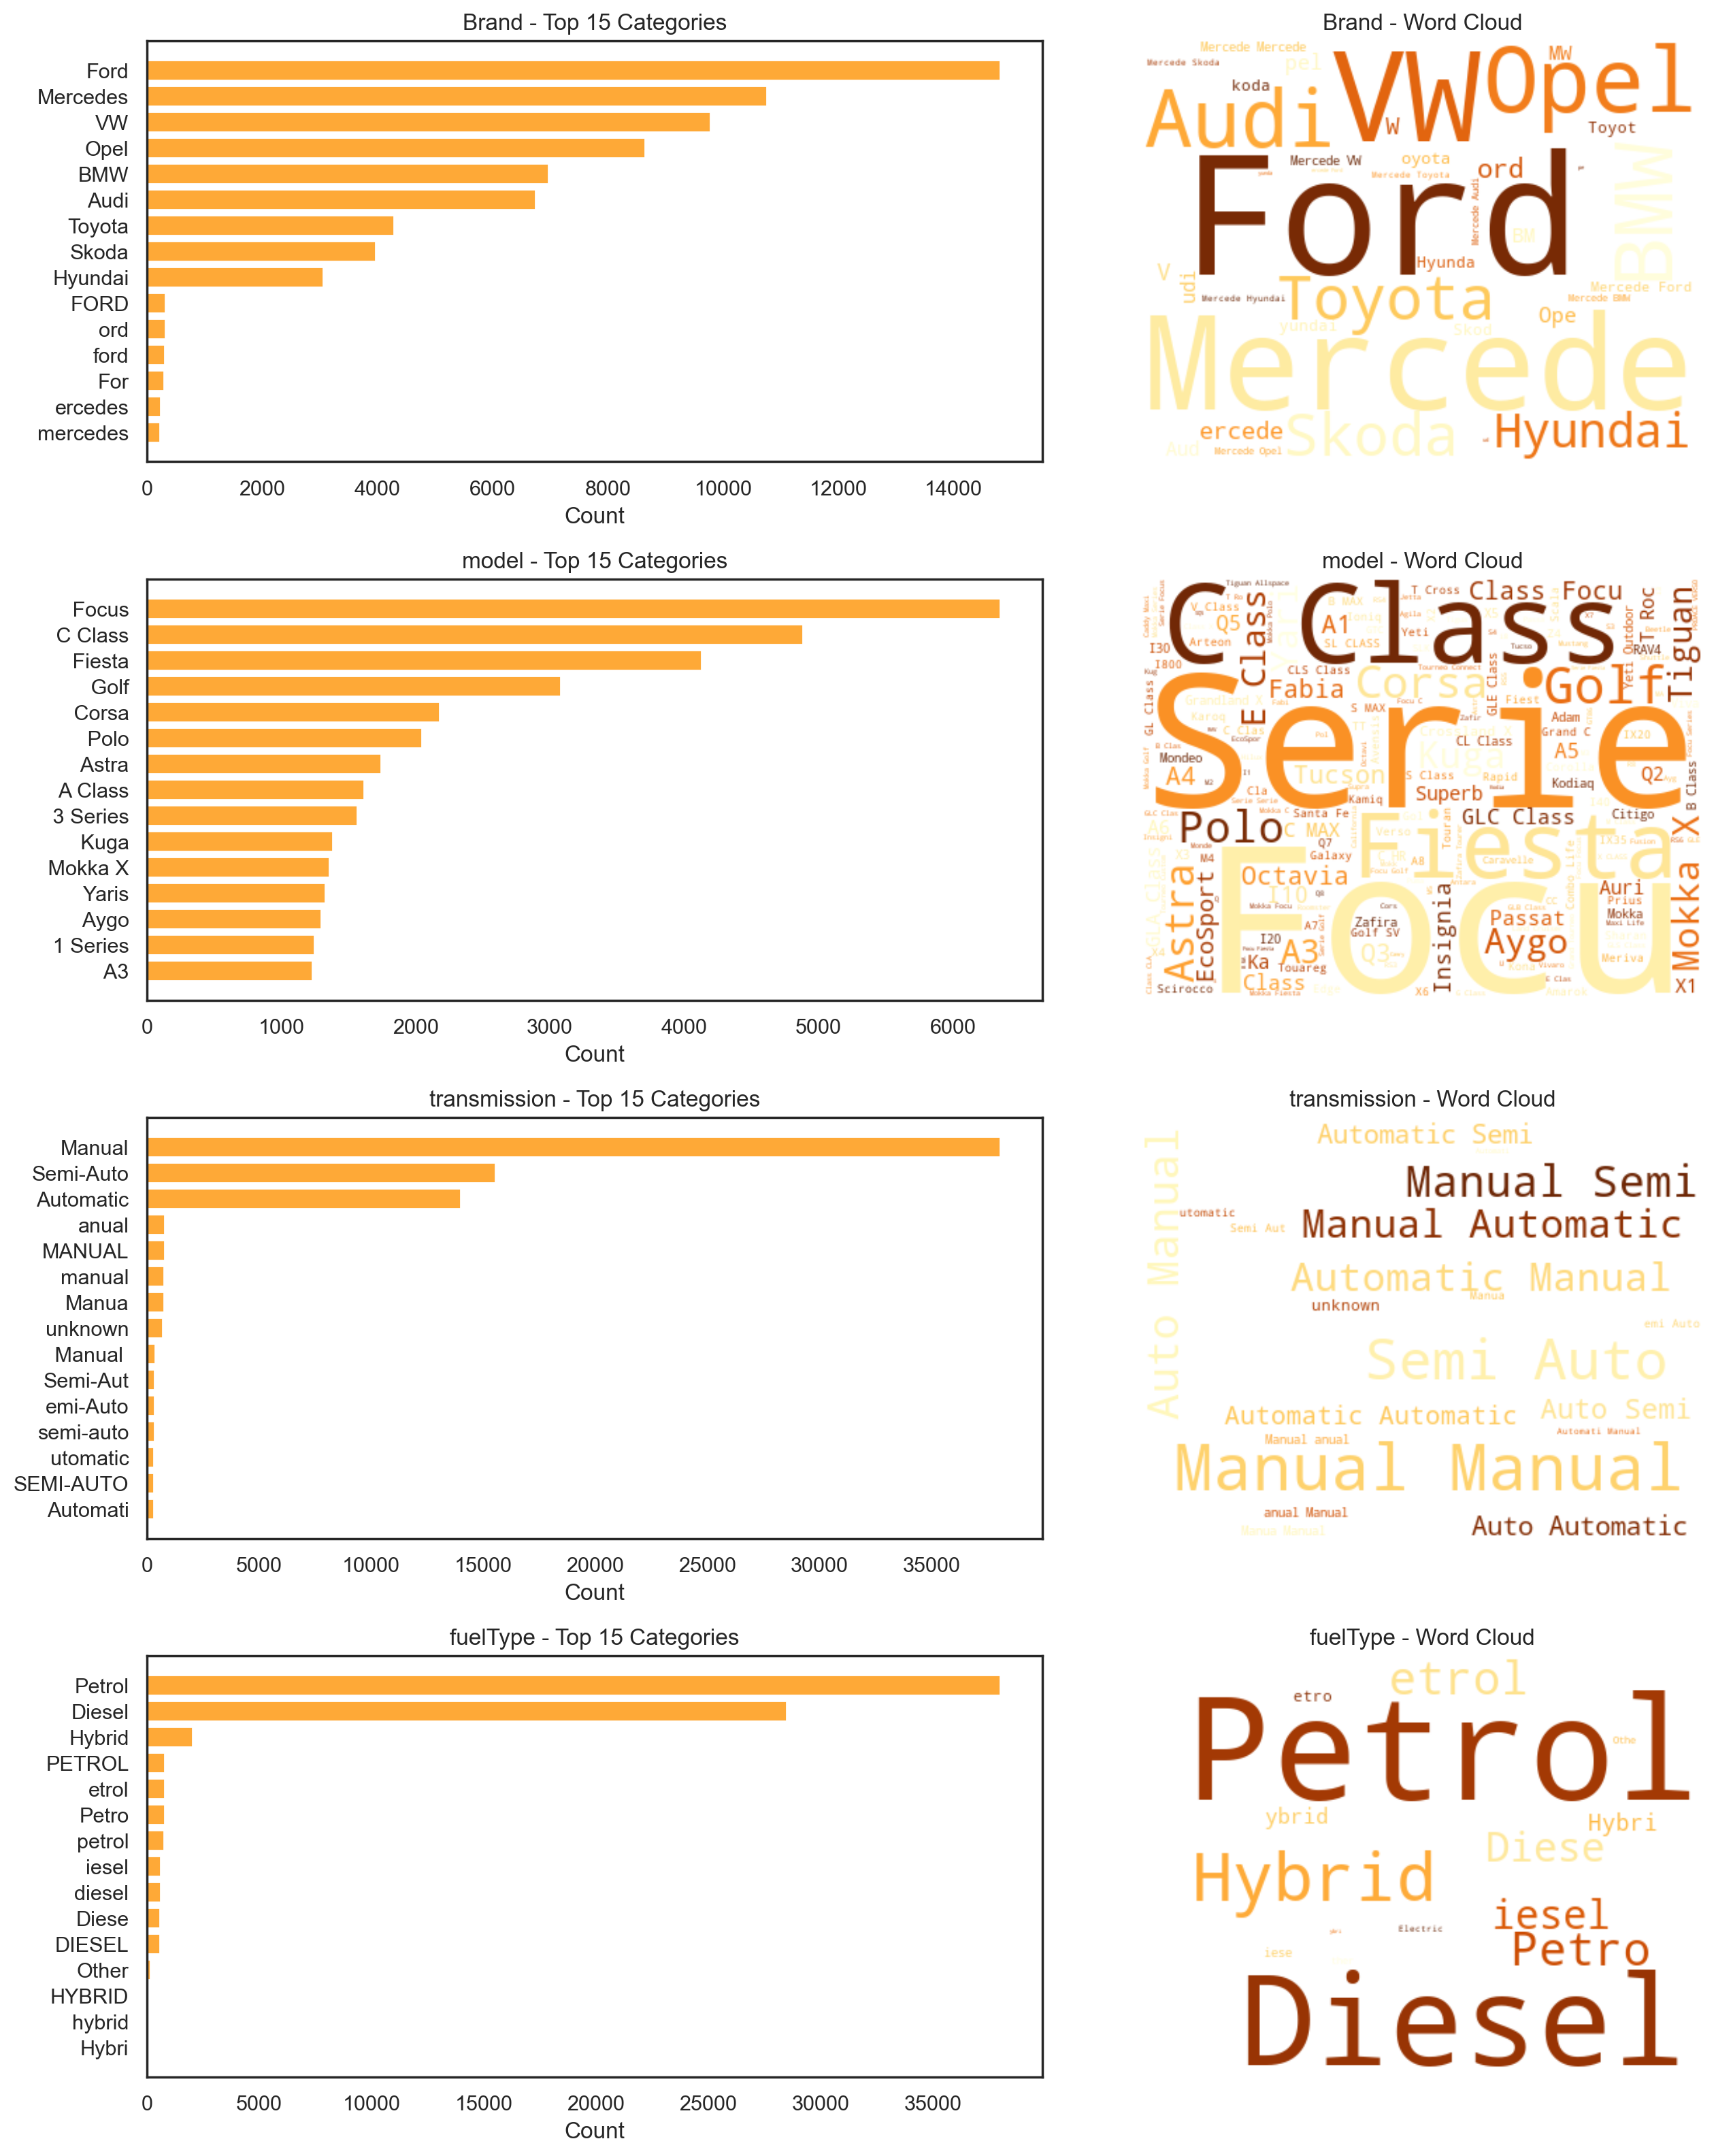

In [73]:
def plot_bar_wordcloud(df, cols):
    """Plot bar charts and word clouds for categorical variables."""
    n = len(cols)
    fig, axes = plt.subplots(n, 2, figsize=(14, 4*n))
    
    if n == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(cols):
        counts = df[col].value_counts()
        
        # Bar chart
        axes[i, 0].barh(counts.index[:15], counts.values[:15], color=palette[4])
        axes[i, 0].set_title(f'{col} - Top 15 Categories')
        axes[i, 0].set_xlabel('Count')
        axes[i, 0].invert_yaxis()
        
        # Word cloud
        text = ' '.join(df[col].dropna().astype(str))
        wordcloud = WordCloud(width=400, height=300, background_color='white',
                             colormap='YlOrBr').generate(text)
        axes[i, 1].imshow(wordcloud, interpolation='bilinear')
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f'{col} - Word Cloud')
    
    plt.tight_layout()
    plt.show()

# Plot categorical distributions
plot_bar_wordcloud(car_eval, cat)

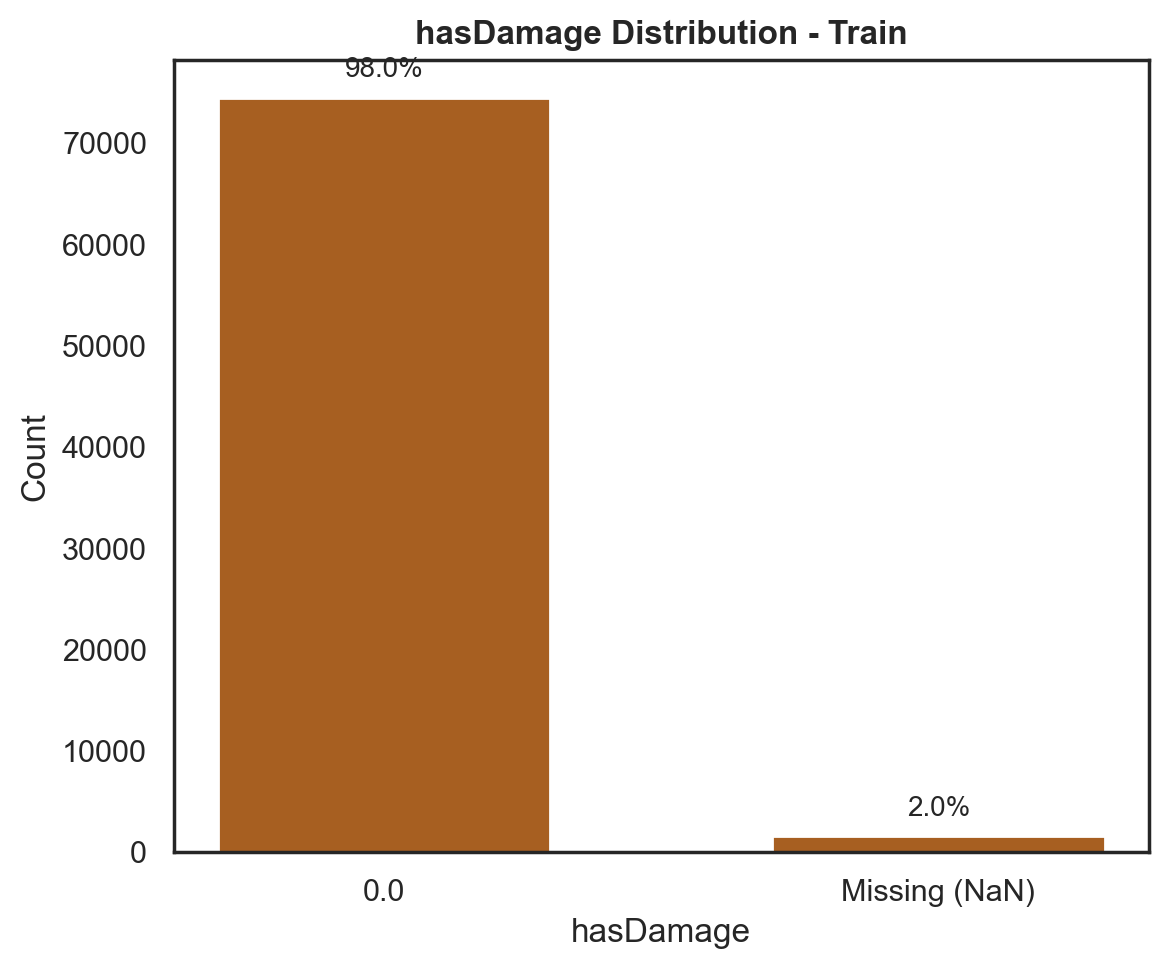

In [74]:
def plot_hasdamage_distribution(df, label='Train'):
    """Plot bar chart for hasDamage distribution."""
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Replace NaN with a label for visibility
    df_temp = df['hasDamage'].fillna('Missing (NaN)')
    counts = df_temp.value_counts()
    
    # Create bar plot
    ax.bar(range(len(counts)), counts.values, color='#a55b1bf9', width=0.6)
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index)
    
    # Add percentage labels
    total = counts.sum()
    for i, v in enumerate(counts.values):
        ax.text(i, v + (counts.max() * 0.02), 
                f'{v/total*100:.1f}%', 
                ha='center', va='bottom', fontsize=10)
    
    ax.set_title(f'hasDamage Distribution - {label}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count')
    ax.set_xlabel('hasDamage')
    
    plt.tight_layout()
    plt.show()

# Plot hasDamage distribution for training data
plot_hasdamage_distribution(car_eval, 'Train')

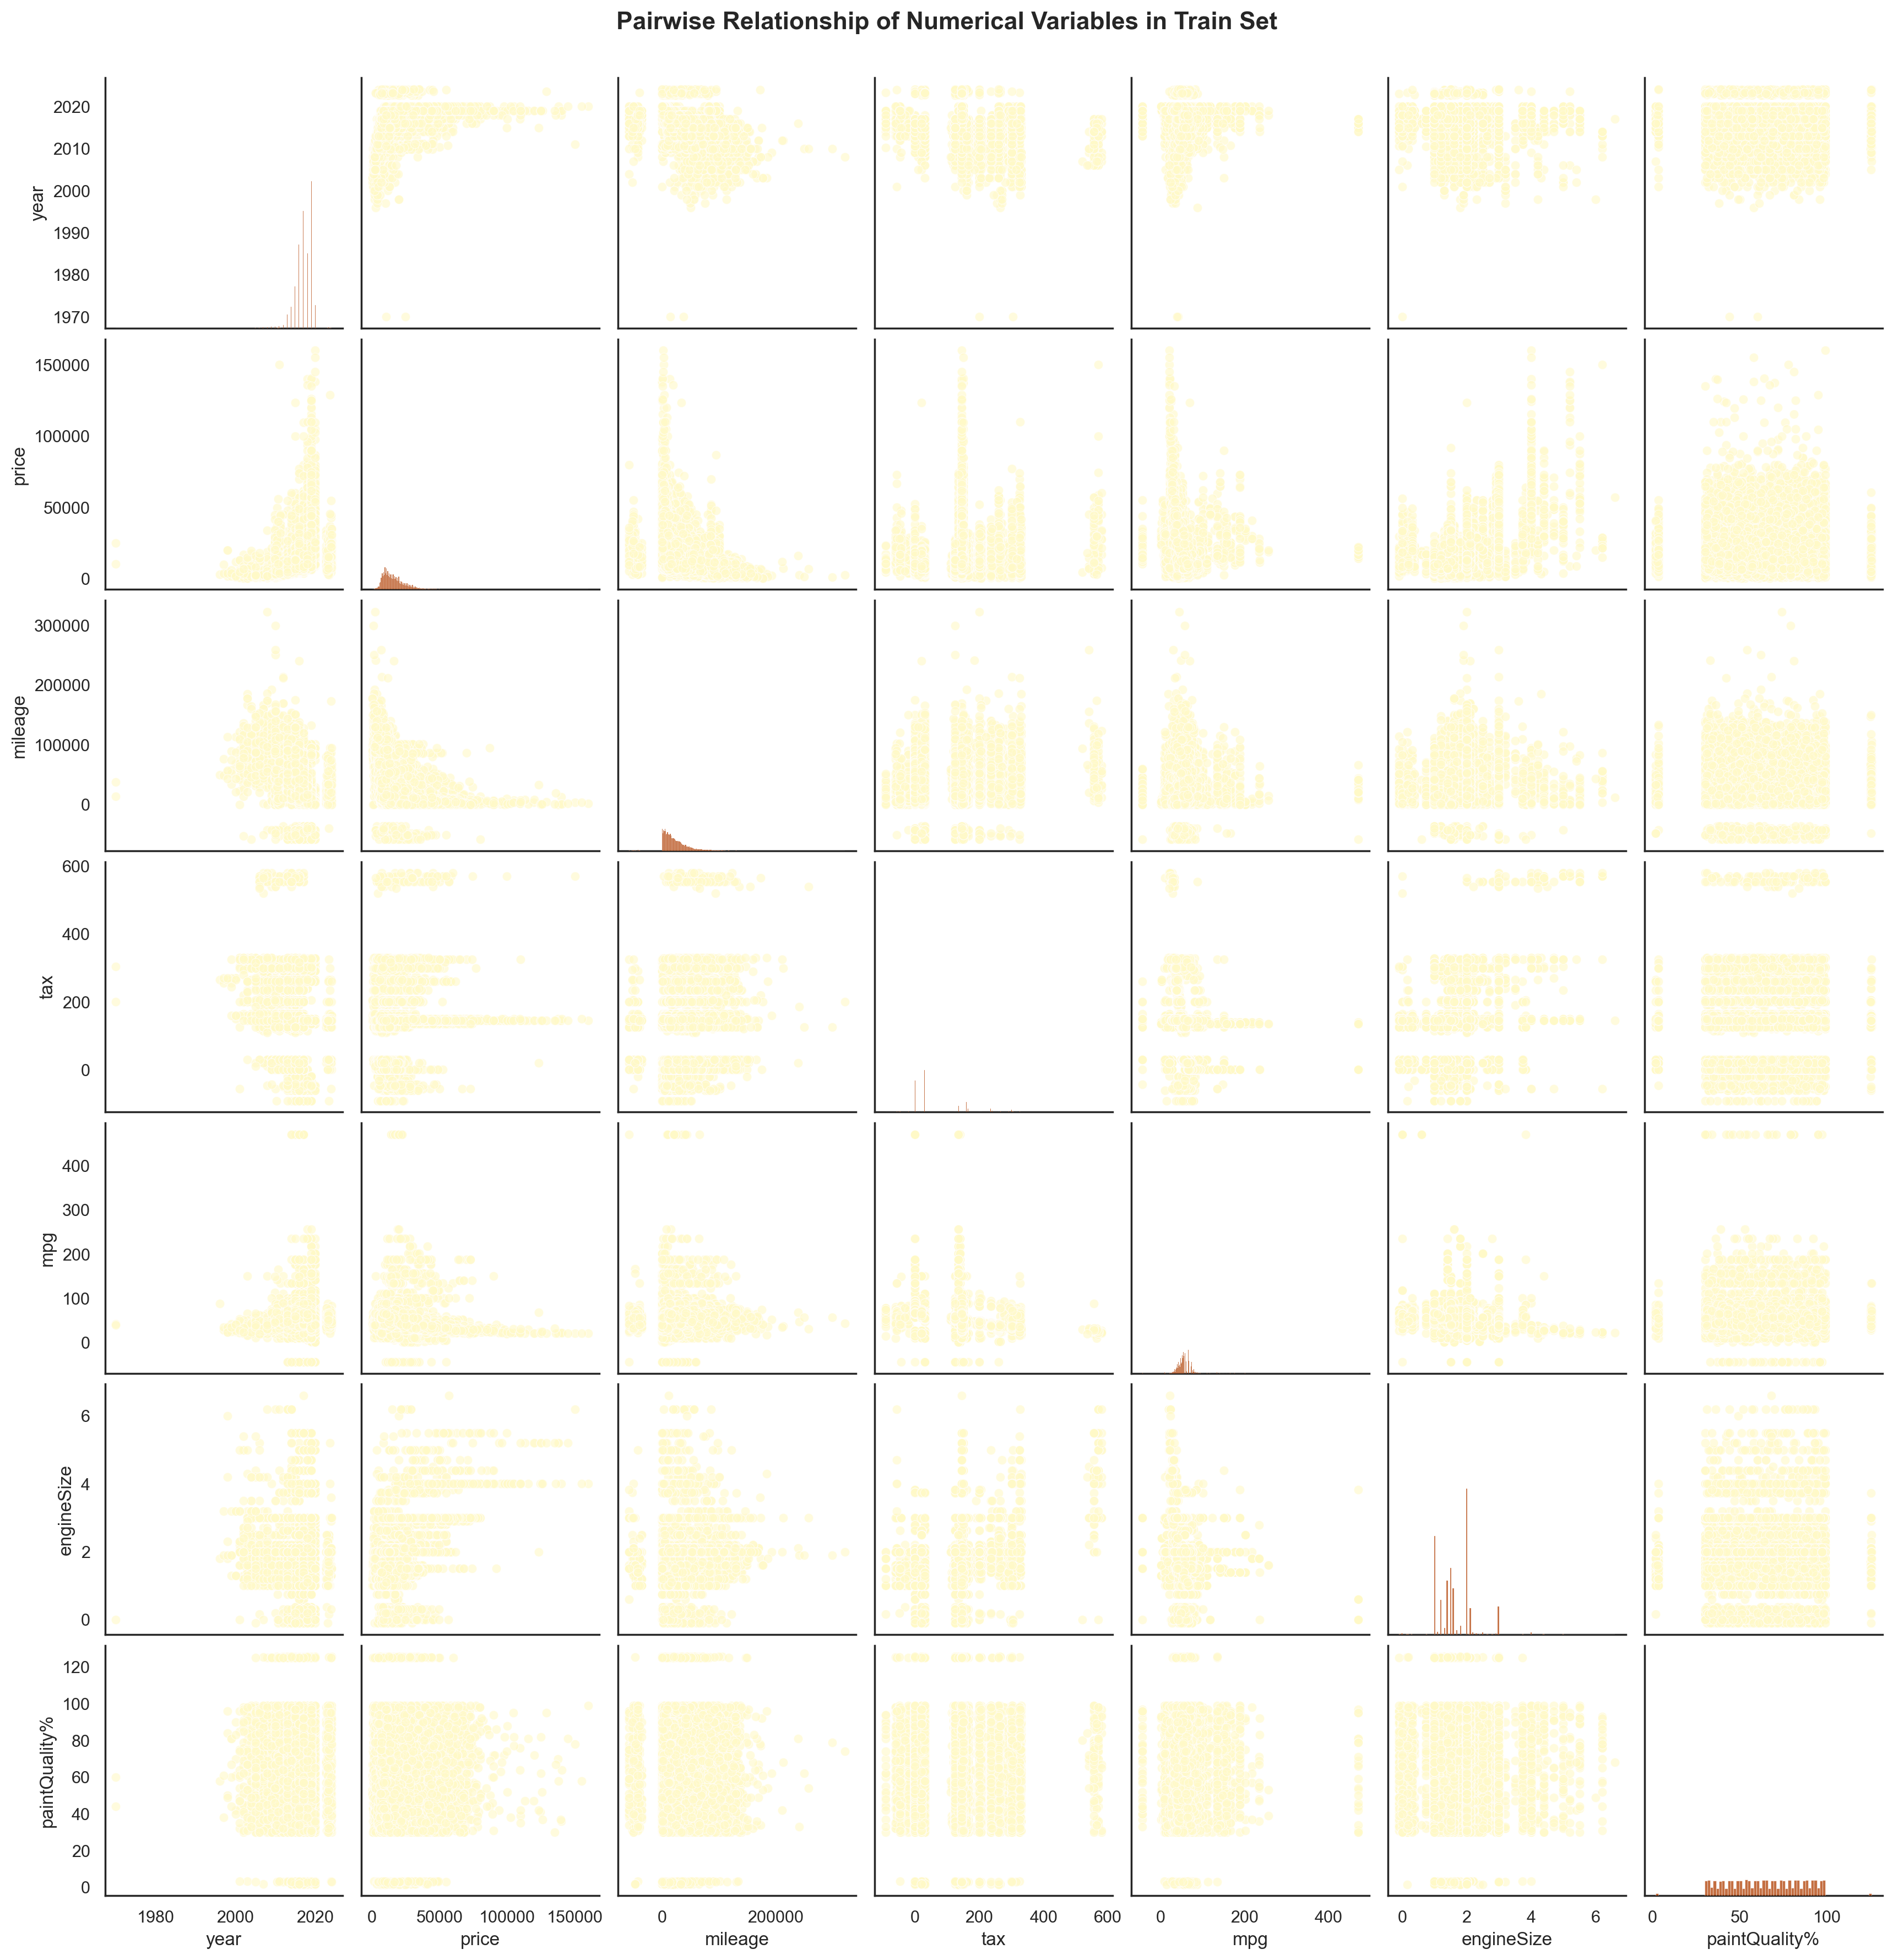

In [75]:
num_filtered = [col for col in num if col not in ['previousOwners', 'hasDamage']]

# Pairwise Relationship of Numerical Variables
sns.pairplot(
    car_eval[num_filtered],
    diag_kind='hist',
    plot_kws={'color': palette[0], 'alpha': 0.6},
    diag_kws={'color': palette[-2]}
)
plt.suptitle('Pairwise Relationship of Numerical Variables in Train Set', fontweight='bold', fontsize=16, y=1.02)
plt.show()

### 3.4 Inconsistency Checks

In [76]:
MAX_UNIQUE_PRINT = 75

# Display unique values for all columns in car_eval
print("\033[1mUnique values for each column:\033[0m")
for col in car_eval.columns:
    unique_values = car_eval[col].unique()
    num_unique = len(unique_values)
    
    print(f"{col} ({num_unique} unique values):")
    
    if num_unique > MAX_UNIQUE_PRINT: #print only the first 75
        print(unique_values[:MAX_UNIQUE_PRINT])
        print(f"[ There are {num_unique - MAX_UNIQUE_PRINT} more unique values ... ]\n")
    else:
        print(unique_values)
        print("\n")

Unique values for each column:
Brand (73 unique values):
['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']


model (736 unique values):
[' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoS

### 3.5 Missing values

In [77]:
def missing_data(train_df, test_df=None):
    """Display missing data summary."""
    cols = train_df.columns if test_df is None else train_df.columns.intersection(test_df.columns)
    
    result = pd.DataFrame({
        'Train n': train_df[cols].isna().sum(),
        'Train %': (train_df[cols].isna().mean() * 100).round(2)
    })
    
    if test_df is not None:
        result['Test n'] = test_df[cols].isna().sum()
        result['Test %'] = (test_df[cols].isna().mean() * 100).round(2)
    
    return result[result['Train n'] > 0].sort_values('Train %', ascending=False)

missing_data(car_eval, X_test)

Train n  Train %  Test n  Test %
mpg                7924    10.43    3288   10.10
tax                7902    10.40    3308   10.16
hasDamage          1548     2.04     597    1.83
previousOwners     1550     2.04     597    1.83
paintQuality%      1524     2.01     625    1.92
transmission       1522     2.00     623    1.91
model              1517     2.00     650    2.00
Brand              1521     2.00     649    1.99
engineSize         1516     2.00     628    1.93
fuelType           1511     1.99     656    2.01
year               1491     1.96     653    2.01
mileage            1462     1.92     689    2.12

### 3.5 Train/Validation Split

Before proceeding with cleaning, we split the training data to ensure no data leakage.

In [78]:
# Split features and target
car_eval = car_eval.reset_index()

X = car_eval.drop(columns=['price'])
y = car_eval[['carID', 'price']]

# Train/validation split (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=True,
    random_state=RANDOM_STATE
)

# Set carID as index
X_train, X_val = [d.set_index('carID') for d in (X_train, X_val)]
y_train, y_val = [d.set_index('carID') for d in (y_train, y_val)]

print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")

X_train: (60769, 12)
X_val: (15193, 12)
y_train: (60769, 1)
y_val: (15193, 1)


In [79]:
# Drop rows with missing values above a threshold (40%)
threshold = 0.4

# % of missing values per row
missing_pct = X_train.isna().mean(axis=1)

# IDs of rows to drop
ids_to_drop = missing_pct[missing_pct >= threshold].index.tolist()

if ids_to_drop:
    print(f"Dropping {len(ids_to_drop)} rows from X_train and y_train (IDs: {ids_to_drop[:5]}{'...' if len(ids_to_drop) > 5 else ''})")
    X_train = X_train.drop(index=ids_to_drop)
    y_train = y_train.drop(index=ids_to_drop)
else:
    print("No rows to drop in X_train/y_train.")

Dropping 1 rows from X_train and y_train (IDs: [44389])


<a id='4-cleaning'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>4 | Data Cleaning</b></span>
    </h1>
</div>

### 4.1 Brand & Model Standardization

The Brand and model columns contain inconsistencies (typos, variations). We use fuzzy matching against a reference dictionary from the wheel-size API.

In [80]:
brand_model_dic_norm = brand_model_dic.copy()

# Define allowed brands
ALLOWED_BRANDS = [
    "Volkswagen", "Toyota", "Audi", "Ford", "BMW", 
    "Skoda", "Opel", "Vauxhall", "Mercedes-Benz", "Hyundai"
]

# Filter to allowed brands only
brand_model_dic_norm = brand_model_dic_norm[
    brand_model_dic_norm["brand"].isin(ALLOWED_BRANDS)
].copy()

# Standardize brand names
brand_model_dic_norm["brand"] = brand_model_dic_norm["brand"].astype(str).str.replace(
    r"(?i)^mercedes[\s-]*benz$", "Mercedes", regex=True
)
brand_model_dic_norm['brand'] = brand_model_dic_norm['brand'].replace('Volkswagen', 'VW', regex=False)
brand_model_dic_norm['brand'] = brand_model_dic_norm['brand'].replace('Vauxhall', 'Opel', regex=False)

# Add manually identified models
extra_rows = [
    {'brand': 'VW', 'model': 'Shuttle'},
    {'brand': 'VW', 'model': 'Caddy Maxi Life'},
    {'brand': 'Skoda', 'model': 'yeti outdoor'}
]
brand_model_dic_norm = pd.concat([brand_model_dic_norm, pd.DataFrame(extra_rows)], ignore_index=True)

# Normalize using utils.norm
brand_model_dic_norm['Brand'] = brand_model_dic_norm['brand'].apply(utils.norm)
brand_model_dic_norm['model'] = brand_model_dic_norm['model'].apply(utils.norm)

# Fix specific model names
brand_model_dic_norm['model'] = brand_model_dic_norm['model'].replace('yeti', 'yeti outdoor', regex=False)
brand_model_dic_norm['model'] = brand_model_dic_norm['model'].replace('slk class', 'slk', regex=False)

# Remove duplicates
brand_model_dic_norm = brand_model_dic_norm.drop_duplicates(subset=['Brand', 'model'])

print(f"Reference dictionary: {len(brand_model_dic_norm)} brand-model combinations")
print(f"Unique brands: {brand_model_dic_norm['Brand'].nunique()}")

Reference dictionary: 985 brand-model combinations
Unique brands: 9


In [81]:
# Create lookup structures
valid_brands = sorted(brand_model_dic_norm['Brand'].dropna().unique())

models_by_brand = (
    brand_model_dic_norm
    .groupby('Brand')['model']
    .apply(list)
    .to_dict()
)

brands_by_model = (
    brand_model_dic_norm
    .groupby('model')['Brand']
    .apply(list)
    .to_dict()
)

# Models that appear in only one brand (can infer brand from model)
unique_brand_by_model = {
    m: brands[0]
    for m, brands in brands_by_model.items()
    if len(brands) == 1
}

# Manual corrections for known typos
MANUAL_MODEL_FIXES = {
    ('hyundai', 'i2'): 'i20',
    ('hyundai', 'ix2'): 'ix20',
}

print(f"Valid brands: {valid_brands}")
print(f"Models with unique brand: {len(unique_brand_by_model)}")

Valid brands: ['audi', 'bmw', 'ford', 'hyundai', 'mercedes', 'opel', 'skoda', 'toyota', 'vw']
Models with unique brand: 971


In [82]:
# Normalize Brand and model in all datasets
for df in [X_train, X_val, X_test]:
    df['Brand'] = df['Brand'].apply(utils.norm)
    df['model'] = df['model'].apply(utils.norm)

print("✅ Brand and model normalized in all datasets")

✅ Brand and model normalized in all datasets


In [83]:
def clean_brand_model_simple(df_to_clean):
    """
    Clean and standardize Brand and model columns using fuzzy matching.
    Tracks all corrections with bm_status and bm_note columns.
    """
    df = df_to_clean.copy()

    if 'Brand' not in df.columns or 'model' not in df.columns:
        raise ValueError("The DataFrame must contain 'Brand' and 'model' columns.")

    df['bm_status'] = 'ok'
    df['bm_note'] = ''

    all_models = brand_model_dic_norm['model'].tolist()

    def _fix_row(row):
        b = row['Brand']
        m = row['model']

        # Transform NaN to empty string
        b = '' if pd.isna(b) else str(b)
        m = '' if pd.isna(m) else str(m)

        # Case 0: Both empty
        if b == '' and m == '':
            row['bm_status'] = 'empty'
            return row

        # Case 1: Brand missing but model filled
        if b == '' and m != '':
            # Special rule: corsa → opel
            if m == 'corsa':
                row['Brand'] = 'opel'
                row['bm_status'] = 'brand_inferred'
                row['bm_note'] = "Brand set to 'opel' because model='corsa'"
                return row

            # If model is unique → infer brand
            if m in unique_brand_by_model:
                new_b = unique_brand_by_model[m]
                row['Brand'] = new_b
                row['bm_status'] = 'brand_inferred'
                row['bm_note'] = f"brand inferred from model '{m}'"
                return row

            # Fuzzy global match on model
            matches = utils.get_best_match(m, all_models)
            if len(matches) == 1:
                matched_model = matches[0]
                brands = brands_by_model.get(matched_model, [])
                if len(brands) == 1:
                    row['Brand'] = brands[0]
                    row['model'] = matched_model
                    row['bm_status'] = 'brand_inferred'
                    row['bm_note'] = f"brand inferred from fuzzy model match '{matched_model}'"
                else:
                    row['model'] = matched_model
                    row['bm_status'] = 'needs_review'
                    row['bm_note'] = f"model corrected to '{matched_model}', ambiguous brand"
            else:
                row['bm_status'] = 'needs_review'
                row['bm_note'] = "brand missing and model without clear match"
            return row

        # Case 2: Brand filled - validate or correct
        if b not in valid_brands:
            b_matches = utils.get_best_match(b, valid_brands)
            if len(b_matches) == 1:
                new_b = b_matches[0]
                row['Brand'] = new_b
                row['bm_status'] = 'brand_corrected'
                row['bm_note'] = f"brand corrected from '{b}' to '{new_b}'"
                b = new_b
            else:
                row['bm_status'] = 'needs_review'
                row['bm_note'] = f"invalid brand: '{b}'"
                return row

        # Manual model corrections
        key = (b, m)
        if key in MANUAL_MODEL_FIXES:
            new_m = MANUAL_MODEL_FIXES[key]
            row['model'] = new_m
            row['bm_status'] = 'model_corrected'
            row['bm_note'] = f"model manually corrected from '{m}' to '{new_m}'"
            m = new_m

        # Case 3: Model missing
        if m == '':
            row['bm_status'] = 'no_model'
            row['bm_note'] = "model missing"
            return row

        # Case 3a: Exact match within brand
        brand_models = models_by_brand.get(b, [])
        if m in brand_models:
            return row  # Perfect match

        # Case 3b: Fuzzy match within brand
        if brand_models:
            m_matches = utils.get_best_match(m, brand_models)
            if len(m_matches) == 1:
                new_m = m_matches[0]
                row['model'] = new_m
                row['bm_status'] = 'model_corrected'
                row['bm_note'] = f"model corrected from '{m}' to '{new_m}' within brand '{b}'"
                return row

        # Case 3c: Global fuzzy match (may change brand)
        m_matches_global = utils.get_best_match(m, all_models)
        if len(m_matches_global) == 1:
            new_m = m_matches_global[0]
            brands_for_m = brands_by_model.get(new_m, [])
            if len(brands_for_m) == 1 and brands_for_m[0] != b:
                new_b = brands_for_m[0]
                row['Brand'] = new_b
                row['model'] = new_m
                row['bm_status'] = 'brand_from_model'
                row['bm_note'] = f"brand changed from '{b}' to '{new_b}' because of model '{new_m}'"
            else:
                row['model'] = new_m
                row['bm_status'] = 'model_corrected'
                row['bm_note'] = f"model corrected globally from '{m}' to '{new_m}'"
            return row

        # Case 3d: No match found
        row['bm_status'] = 'needs_review'
        row['bm_note'] = f"combination Brand='{b}', model='{m}' has no acceptable fuzzy match"
        return row

    df = df.apply(_fix_row, axis=1)
    return df

In [84]:
# Apply cleaning to ALL datasets
print("Cleaning X_train...")
X_train_clean = clean_brand_model_simple(X_train)

print("Cleaning X_val...")
X_val_clean = clean_brand_model_simple(X_val)

print("Cleaning X_test...")
X_test_clean = clean_brand_model_simple(X_test)

# Show status distribution for training set
print("\n=== X_train Status Distribution ===")
print(X_train_clean['bm_status'].value_counts())

Cleaning X_train...
Cleaning X_val...
Cleaning X_test...

=== X_train Status Distribution ===
bm_status
ok                  54747
brand_corrected      2300
no_model             1206
brand_inferred       1184
model_corrected      1086
needs_review          155
brand_from_model       66
empty                  24
Name: count, dtype: int64


In [85]:
# Show rows that need review
print("\n=== Rows needing review (X_train) ===")
needs_review = X_train_clean[X_train_clean['bm_status'] == 'needs_review'][['Brand', 'model', 'bm_note']]
print(f"Total: {len(needs_review)} rows")
display(needs_review.head(20))


=== Rows needing review (X_train) ===
Total: 155 rows


Brand   model                                            bm_note
carID                                                                 
7816    bmw       m  combination Brand='bmw', model='m' has no acce...
2047   audi       a  combination Brand='audi', model='a' has no acc...
5424   audi       a  combination Brand='audi', model='a' has no acc...
1591   audi       q  combination Brand='audi', model='q' has no acc...
4415   audi       a  combination Brand='audi', model='a' has no acc...
510    audi       q  combination Brand='audi', model='q' has no acc...
6050   audi       a  combination Brand='audi', model='a' has no acc...
12253   bmw       x  combination Brand='bmw', model='x' has no acce...
4995   audi       q  combination Brand='audi', model='q' has no acc...
3164   audi       a  combination Brand='audi', model='a' has no acc...
12679   bmw       x  combination Brand='bmw', model='x' has no acce...
6500   audi       q  combination Brand='audi', model='q' has no acc...
14098  None       x        brand missing and model without clear match
1947   audi       a  combination Brand='audi', model='a' has no acc...
8001    bmw       x  combination Brand='bmw', model='x' has no acce...
60724  opel  kadjar  combination Brand='opel', model='kadjar' has n...
9990    bmw       x  combination Brand='bmw', model='x' has no acce...
6943   audi       a  combination Brand='audi', model='a' has no acc...
4351   audi       q  combination Brand='audi', model='q' has no acc...
2723   audi       a  combination Brand='audi', model='a' has no acc...

#### _Impute Model by Engine Size_

In [86]:
K_NEIGHBORS = 5

def impute_model_by_engine_size(df_in, reference_df=None):
    """
    Impute model for 'needs_review' rows using KNN on engineSize.
    Uses reference_df for finding neighbors (to prevent data leakage).
    """
    df = df_in.copy()
    
    # Use self as reference if not provided
    if reference_df is None:
        reference_df = df
    
    mask_needs_review = df['bm_status'] == 'needs_review'
    df_needs_review = df[mask_needs_review]
    df_reference = reference_df[reference_df['bm_status'] != 'needs_review'].copy()
    
    corrected_models = {}

    for car_id, row in df_needs_review.iterrows():
        current_brand = row['Brand']
        current_model = row['model']
        current_engine_size = row['engineSize']
        
        if pd.isna(current_brand) or pd.isna(current_engine_size):
            continue

        # Filter references by same Brand
        ref_by_brand = df_reference[df_reference['Brand'] == current_brand].copy()

        # For short models (≤2 chars), match by prefix
        if len(str(current_model)) <= 2:
            ref_by_brand = ref_by_brand[
                ref_by_brand['model'].str.startswith(str(current_model), na=False)
            ]
        
        ref_by_brand = ref_by_brand.dropna(subset=['engineSize'])
        if ref_by_brand.empty:
            continue

        # Find K nearest neighbors by engineSize
        distance = np.abs(ref_by_brand['engineSize'] - current_engine_size)
        nearest_neighbors = distance.nsmallest(K_NEIGHBORS).index
        
        # Use mode of neighbors' models
        inferred_model = ref_by_brand.loc[nearest_neighbors, 'model'].mode().iloc[0]
        corrected_models[car_id] = inferred_model

    # Update DataFrame
    for car_id, new_model in corrected_models.items():
        df.loc[car_id, 'model'] = new_model
        df.loc[car_id, 'bm_status'] = 'model_imputed_by_esize'
        df.loc[car_id, 'bm_note'] = f"Model imputed to '{new_model}' using engineSize/prefix similarity."
        
    return df

In [87]:
# Apply imputation - use X_train_clean as reference for all datasets
X_train_clean = impute_model_by_engine_size(X_train_clean, reference_df=X_train_clean)
X_val_clean = impute_model_by_engine_size(X_val_clean, reference_df=X_train_clean)
X_test_clean = impute_model_by_engine_size(X_test_clean, reference_df=X_train_clean)

print("X_train status:", X_train_clean['bm_status'].value_counts().to_dict())
print("X_val status:", X_val_clean['bm_status'].value_counts().to_dict())
print("X_test status:", X_test_clean['bm_status'].value_counts().to_dict())

X_train status: {'ok': 54747, 'brand_corrected': 2300, 'no_model': 1206, 'brand_inferred': 1184, 'model_corrected': 1086, 'model_imputed_by_esize': 149, 'brand_from_model': 66, 'empty': 24, 'needs_review': 6}
X_val status: {'ok': 13780, 'brand_corrected': 511, 'brand_inferred': 296, 'no_model': 274, 'model_corrected': 266, 'model_imputed_by_esize': 34, 'brand_from_model': 20, 'empty': 12}
X_test status: {'ok': 29400, 'brand_corrected': 1215, 'no_model': 634, 'brand_inferred': 630, 'model_corrected': 560, 'model_imputed_by_esize': 60, 'brand_from_model': 47, 'empty': 16, 'needs_review': 5}


#### _Handle Remaining Unresolved Cases_

In [88]:
def force_missing_model(df_in):
    """Set model to None for remaining unresolved cases."""
    df = df_in.copy()
    mask = df['bm_status'] == 'needs_review'
    
    df.loc[mask, 'model'] = None
    df.loc[mask, 'bm_status'] = 'forced_missing'
    df.loc[mask, 'bm_note'] = "model set to missing due to unresolved review status."
    
    return df

# Apply to all datasets
X_train_clean = force_missing_model(X_train_clean)
X_val_clean = force_missing_model(X_val_clean)
X_test_clean = force_missing_model(X_test_clean)

# Verify no more needs_review
print("Remaining 'needs_review' cases:")
print(f"  X_train: {(X_train_clean['bm_status'] == 'needs_review').sum()}")
print(f"  X_val: {(X_val_clean['bm_status'] == 'needs_review').sum()}")
print(f"  X_test: {(X_test_clean['bm_status'] == 'needs_review').sum()}")

Remaining 'needs_review' cases:
  X_train: 0
  X_val: 0
  X_test: 0


In [89]:
# Drop status columns and update main dataframes
X_train_clean.drop(columns=['bm_status', 'bm_note'], inplace=True)
X_val_clean.drop(columns=['bm_status', 'bm_note'], inplace=True)
X_test_clean.drop(columns=['bm_status', 'bm_note'], inplace=True)

# Replace original dataframes
X_train = X_train_clean.copy()
X_val = X_val_clean.copy()
X_test = X_test_clean.copy()

print("✅ Brand/Model cleaning complete for all datasets")

✅ Brand/Model cleaning complete for all datasets


#### _Handle Unseen Models in Val/Test_

In [90]:
# Check for models in val/test not seen in training
train_models = set(X_train['model'].dropna().unique())

for df, name in [(X_val, 'Validation'), (X_test, 'Test')]:
    df_models = set(df['model'].dropna().unique())
    unseen = df_models - train_models
    if unseen:
        print(f"Unseen models in {name}: {len(unseen)}")
        df.loc[df['model'].isin(unseen), 'model'] = 'other'

print(f"\nUnique brands in training: {X_train['Brand'].nunique()}")
print(f"Unique models in training: {X_train['model'].nunique()}")

Unseen models in Validation: 4
Unseen models in Test: 8

Unique brands in training: 9
Unique models in training: 182


### 4.2 Numeric Variables Cleaning

In [91]:
# Clean numeric variables
for df in [X_train, X_val, X_test]:
    # Year: take absolute value, cap at 2020
    df['year'] = df['year'].apply(lambda x: abs(int(x)) if pd.notnull(x) else x)
    df.loc[df['year'] > 2020, 'year'] = 2020
    
    # Mileage: take absolute value
    df['mileage'] = df['mileage'].apply(lambda x: abs(float(x)) if pd.notnull(x) else np.nan)
    
    # Tax: take absolute value
    df['tax'] = df['tax'].apply(lambda x: abs(float(x)) if pd.notnull(x) else np.nan)
    
    # MPG: take absolute value
    df['mpg'] = df['mpg'].apply(lambda x: abs(float(x)) if pd.notnull(x) else np.nan)
    
    # Engine Size: 0 values are missing
    df.loc[df['engineSize'] == 0, 'engineSize'] = np.nan
    df['engineSize'] = df['engineSize'].apply(lambda x: abs(float(x)) if pd.notnull(x) else np.nan)
    
    # Paint Quality: clip to [0, 100]
    df['paintQuality%'] = pd.to_numeric(df['paintQuality%'], errors='coerce').clip(0, 100)
    
    # Previous Owners: take absolute value
    df['previousOwners'] = df['previousOwners'].apply(lambda x: abs(int(x)) if pd.notnull(x) else np.nan)

print("✅ Numeric variables cleaned")

✅ Numeric variables cleaned


### 4.3 Categorical Variables Cleaning

In [92]:
def correct_categorical_value(input_value, valid_values, min_score=0.6, fallback='unknown'):
    """Correct categorical value using fuzzy matching."""
    normalized = utils.norm(input_value)
    matches = utils.get_best_match(normalized, valid_values, min_score=min_score)
    
    if isinstance(matches, list) and len(matches) == 1:
        return matches[0]
    elif isinstance(matches, list) and len(matches) > 1:
        return None 
    return fallback

# Define valid values
transmission_valid = [utils.norm(x) for x in ['Manual', 'Automatic', 'Semi-Auto', 'Other']]
fueltype_valid = [utils.norm(x) for x in ['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other']]

# Apply corrections
for df in [X_train, X_val, X_test]:
    df['transmission'] = df['transmission'].apply(lambda x: correct_categorical_value(x, transmission_valid))
    df['fuelType'] = df['fuelType'].apply(lambda x: correct_categorical_value(x, fueltype_valid))

print("Transmission values:", X_train['transmission'].unique())
print("Fuel type values:", X_train['fuelType'].unique())

Transmission values: ['manual' 'semi auto' 'automatic' 'unknown' 'other']
Fuel type values: ['diesel' 'petrol' 'hybrid' 'unknown' 'other' 'electric']


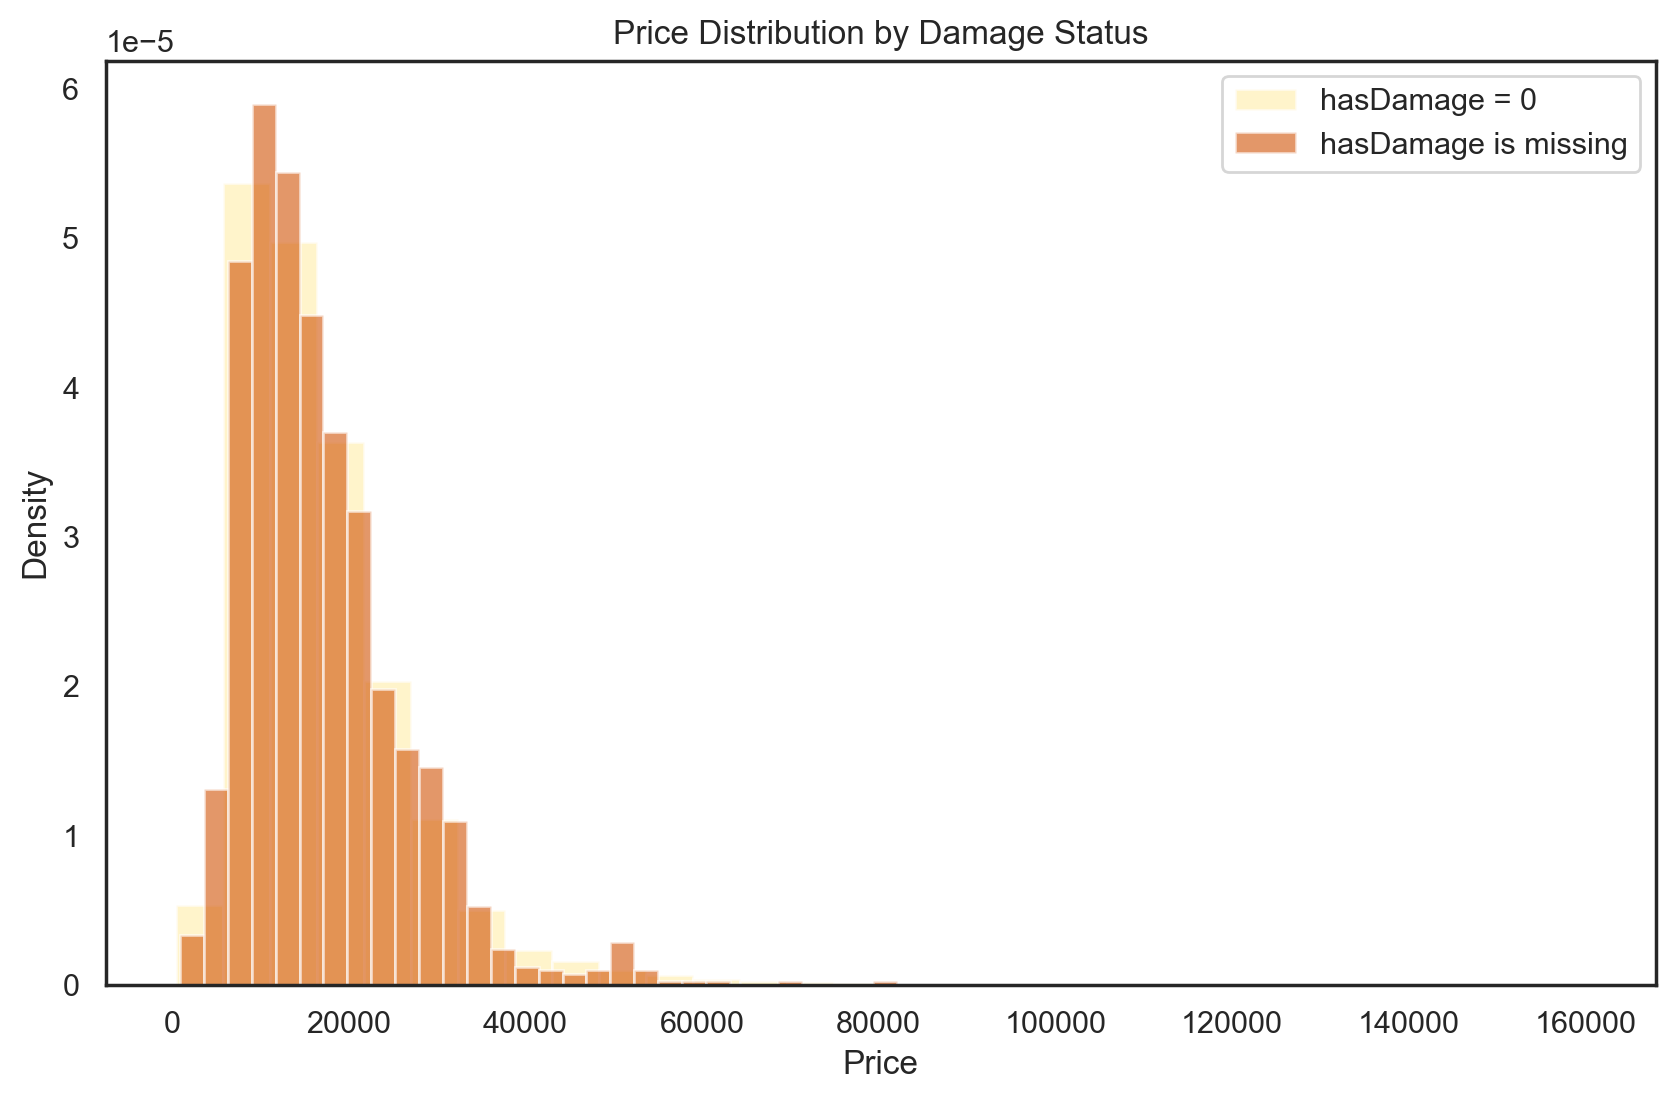

In [93]:
price_hasdamage_0 = car_eval.loc[car_eval['hasDamage'] ==0, 'price']
price_hasdamage_na = car_eval.loc[car_eval['hasDamage'].isna(), 'price']

plt.figure(figsize=(10,6))
plt.hist(price_hasdamage_0, bins=30, alpha=0.6, label='hasDamage = 0', color=palette[1], density=True)
plt.hist(price_hasdamage_na, bins=30, alpha=0.6, label='hasDamage is missing', color=palette[-3], density=True)

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution by Damage Status')
plt.legend()
plt.show()

In [94]:
# Remove duplicates after cleaning
before = len(X_train)
X_train = X_train.drop_duplicates(keep='last')
y_train = y_train.loc[X_train.index]
print(f"Removed {before - len(X_train)} duplicates from training set")

# Fill remaining NaN in Brand/model with 'unknown'
for df in [X_train, X_val, X_test]:
    df['Brand'] = df['Brand'].fillna('unknown').replace('None', 'unknown')
    df['model'] = df['model'].fillna('unknown').replace('None', 'unknown')

Removed 5 duplicates from training set


<a id='5-missing'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>5 | Missing Data Treatment</b></span>
    </h1>
</div>

### 5.1 MAR/MCAR Analysis

We test whether missing data is **Missing Completely At Random (MCAR)** or **Missing At Random (MAR)** to choose the appropriate imputation strategy.

In [95]:
def test_missingness(df, target, num_cols):
    """
    Test if missingness in target column is related to other variables.
    Uses t-tests for numeric and chi-square for categorical predictors.
    """
    df = df.copy()
    miss_col = target + '_missing'
    df[miss_col] = df[target].isna().astype(int)
    
    results = []
    
    # Numeric predictors: t-tests
    for col in num_cols:
        if col != target and col in df.columns:
            group0 = df.loc[df[miss_col] == 0, col].dropna()
            group1 = df.loc[df[miss_col] == 1, col].dropna()
            if len(group0) > 1 and len(group1) > 1:
                _, p = ttest_ind(group0, group1, equal_var=False)
                results.append((target, col, 't-test', p))
    
    # Categorical predictors: chi-square
    cat_cols = df.select_dtypes(exclude='number').columns
    for col in cat_cols:
        if col != miss_col:
            table = pd.crosstab(df[col], df[miss_col])
            if table.shape[0] > 1:
                _, p, _, _ = chi2_contingency(table)
                results.append((target, col, 'chi-square', p))
    
    return pd.DataFrame(results, columns=['Target', 'Variable', 'Test', 'p_value'])

In [96]:
# Join with price for analysis
X_train_with_price = X_train.join(y_train)

# Identify variables with missing values
vars_with_missing = [col for col in X_train.columns if X_train[col].isna().sum() > 0]
num_cols = X_train_with_price.select_dtypes('number').columns

# Test each variable
all_results = []
for var in vars_with_missing:
    results = test_missingness(X_train_with_price, var, num_cols)
    sig_vars = results[results['p_value'] < 0.05]['Variable'].tolist()
    status = "MAR" if len(sig_vars) > 0 else "MCAR"
    all_results.append({
        'Variable': var,
        'Missing_n': X_train[var].isna().sum(),
        'Missing_%': round(X_train[var].isna().mean() * 100, 2),
        'Status': status,
        'Related_to': ', '.join(sig_vars[:5]) + ('...' if len(sig_vars) > 5 else '') if sig_vars else '—'
    })

summary = pd.DataFrame(all_results).sort_values('Missing_%', ascending=False)
summary

Variable  Missing_n  Missing_% Status  \
3             mpg       6344      10.44    MAR   
2             tax       6307      10.38    MAR   
4      engineSize       1351       2.22    MAR   
7       hasDamage       1264       2.08   MCAR   
6  previousOwners       1258       2.07   MCAR   
5   paintQuality%       1230       2.02   MCAR   
0            year       1220       2.01    MAR   
1         mileage       1150       1.89   MCAR   

                                 Related_to  
3  year, engineSize, price, Brand, model...  
2    year, mpg, engineSize, price, Brand...  
4                  mpg, model, transmission  
7                                         —  
6                                         —  
5                                         —  
0                                  fuelType  
1                                         —

### 5.2 Imputation Strategy

- **MCAR variables**: Simple imputation (mean/median/mode)
- **MAR variables**: MICE Imputation

#### _MCAR Imputation (Simple)_

In [97]:
# MCAR variables: simple imputation
paint_mean = X_train['paintQuality%'].mean()
owners_median = X_train['previousOwners'].median()
mileage_median = X_train['mileage'].median()
damage_median = X_train['hasDamage'].median()

for df in [X_train, X_val, X_test]:
    df['paintQuality%'] = pd.to_numeric(df['paintQuality%'], errors='coerce').fillna(paint_mean)
    df['previousOwners'] = pd.to_numeric(df['previousOwners'], errors='coerce').fillna(owners_median)
    df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce').fillna(mileage_median)
    df['hasDamage'] = pd.to_numeric(df['hasDamage'], errors='coerce').fillna(damage_median)

print("✅ MCAR variables imputed")

✅ MCAR variables imputed


In [98]:
# mode for Brand and model
brand_mode = X_train['Brand'].mode()[0]
model_mode_per_brand = (
    X_train.groupby('Brand')['model']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'unknown')
    .to_dict()
)
print(f"Mode of Brand: {brand_mode}")
print("Mode of model by Brand:")
for brand, mode in model_mode_per_brand.items():
    print(f"  {brand}: {mode}")

Mode of Brand: ford
Mode of model by Brand:
  audi: a3
  bmw: 3 series
  ford: focus
  hyundai: tucson
  mercedes: c class
  opel: corsa
  skoda: fabia
  toyota: yaris
  unknown: unknown
  vw: golf


In [99]:
# For categorical MCAR variables (Brand and model): use mode to fill missing values
X_train['Brand'] = X_train['Brand'].fillna(brand_mode)
missing_mask = X_train['model'].isna()
X_train.loc[missing_mask, 'model'] = X_train.loc[missing_mask, 'Brand'].map(model_mode_per_brand)

#### _MAR Imputation (MICE)_

In [100]:
# Create missing flags for MAR variables before imputation
mar_vars = ['mpg', 'tax', 'engineSize', 'year']

for var in mar_vars:
    flag_col = f"{var}_is_missing"
    for df in [X_train, X_val, X_test]:
        df[flag_col] = df[var].isna().astype(int)

print(f"Created missing flags for: {mar_vars}")

Created missing flags for: ['mpg', 'tax', 'engineSize', 'year']


In [101]:
# MICE imputation for MAR variables
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

mice_imputer = IterativeImputer(max_iter=10, random_state=RANDOM_STATE)
scaler = RobustScaler()

# Fit on training data
train_numeric = X_train[numeric_cols].copy()
train_imputed = mice_imputer.fit_transform(train_numeric)
train_scaled = scaler.fit_transform(train_imputed)

X_train[numeric_cols] = pd.DataFrame(train_scaled, index=X_train.index, columns=numeric_cols)

# Transform validation and test
for df in [X_val, X_test]:
    df_numeric = df[numeric_cols].copy()
    df_imputed = mice_imputer.transform(df_numeric)
    df_scaled = scaler.transform(df_imputed)
    df[numeric_cols] = pd.DataFrame(df_scaled, index=df.index, columns=numeric_cols)

print("✅ MICE imputation and RobustScaler applied to all datasets")

✅ MICE imputation and RobustScaler applied to all datasets


In [102]:
missing_data(X_train)

Empty DataFrame
Columns: [Train n, Train %]
Index: []

In [103]:
#Check for duplicates in the training sets
utils.print_dup_info(X_train, name="X_train")

Total duplicates in X_train: 0


In [104]:
# Get the shape of the datasets
print("X_train shape after removing duplicates:", X_train.shape)
print("y_train shape after removing duplicates:", y_train.shape)

X_train shape after removing duplicates: (60763, 16)
y_train shape after removing duplicates: (60763, 1)


<a id='6-outliers'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>6 | Outlier Detection</b></span>
    </h1>
</div>

In [105]:
def compare_outlier_detection(df, columns, iqr_factor=1.5, mad_threshold=3.5, return_indices=False):

    # Just to ensure columns is a list
    if isinstance(columns, str):
        columns = [columns]
    
    results_list = []
    all_indices = {'iqr': set(), 'mad': set(), 'both': set()}

    # Iterate through each column
    for column in columns:
        if column not in df.columns:
            print(f"Column '{column}' not found in the DataFrame. Skipping.")
            continue
        
        data_series = df[column]

        ### IQR Method Calculations ###
        Q1 = data_series.quantile(0.25)
        Q3 = data_series.quantile(0.75)
        IQR = Q3-Q1
        iqr_lower_bound = Q1- (iqr_factor * IQR)
        iqr_upper_bound = Q3+ (iqr_factor * IQR)
        iqr_outliers_filter = (data_series < iqr_lower_bound) | (data_series > iqr_upper_bound)
        iqr_outlier_indices = set(df[iqr_outliers_filter].index)
        
        ### MAD Method Calculations ###
        median = data_series.median()
        mad = (data_series - median).abs().median()
        
        # Handle case where MAD is zero
        if mad == 0:
            mad_lower_bound = median
            mad_upper_bound = median
            # If MAD is zero, consider all values as outliers that are not equal to the median
            mad_outliers_filter = (data_series != median)
        else:
            mad_lower_bound = median - (mad_threshold * mad)
            mad_upper_bound = median + (mad_threshold * mad)
            mad_outliers_filter = (data_series < mad_lower_bound) | (data_series > mad_upper_bound)
        
        mad_outlier_indices = set(df[mad_outliers_filter].index)

        # Comparison Calculations
        both_indices = iqr_outlier_indices.intersection(mad_outlier_indices)
        
        column_summary = {
            'Column': column,
            'Outlier Count (IQR)': len(iqr_outlier_indices),
            'Outlier % (IQR)': round(len(iqr_outlier_indices) / len(df) * 100, 2),
            'Outlier Count (MAD)': len(mad_outlier_indices),
            'Outlier % (MAD)': round(len(mad_outlier_indices) / len(df) * 100, 2),
            'Outlier Count (Both)': len(both_indices),
            'Outlier % (Both)': round(len(both_indices) / len(df) * 100, 2),
        }
        results_list.append(column_summary)

        # Store indices if requested
        if return_indices:
            all_indices['iqr'].update(iqr_outlier_indices)
            all_indices['mad'].update(mad_outlier_indices)
                    
    if return_indices:
        all_indices['both'] = all_indices['iqr'].intersection(all_indices['mad'])
        for key in all_indices:
            all_indices[key] = sorted(list(all_indices[key]))

    summary_df = pd.DataFrame(results_list).set_index('Column')
    
    if return_indices:
        return summary_df, all_indices
        
    return summary_df

In [106]:
num_outliers= num.drop(['hasDamage', 'price'])
outliers_train, indices_train = compare_outlier_detection(X_train, num_outliers, return_indices=True)
outliers_train

Outlier Count (IQR)  Outlier % (IQR)  Outlier Count (MAD)  \
Column                                                                      
year                           1340             2.21                 3281   
mileage                        2715             4.47                 4450   
tax                           16259            26.76                24431   
mpg                            1375             2.26                 1894   
engineSize                      517             0.85                 3724   
paintQuality%                     0             0.00                  288   
previousOwners                    0             0.00                  286   

                Outlier % (MAD)  Outlier Count (Both)  Outlier % (Both)  
Column                                                                   
year                       5.40                  1340              2.21  
mileage                    7.32                  2715              4.47  
tax                       40.21                 16259             26.76  
mpg                        3.12                  1375              2.26  
engineSize                 6.13                   517              0.85  
paintQuality%              0.47                     0              0.00  
previousOwners             0.47                     0              0.00

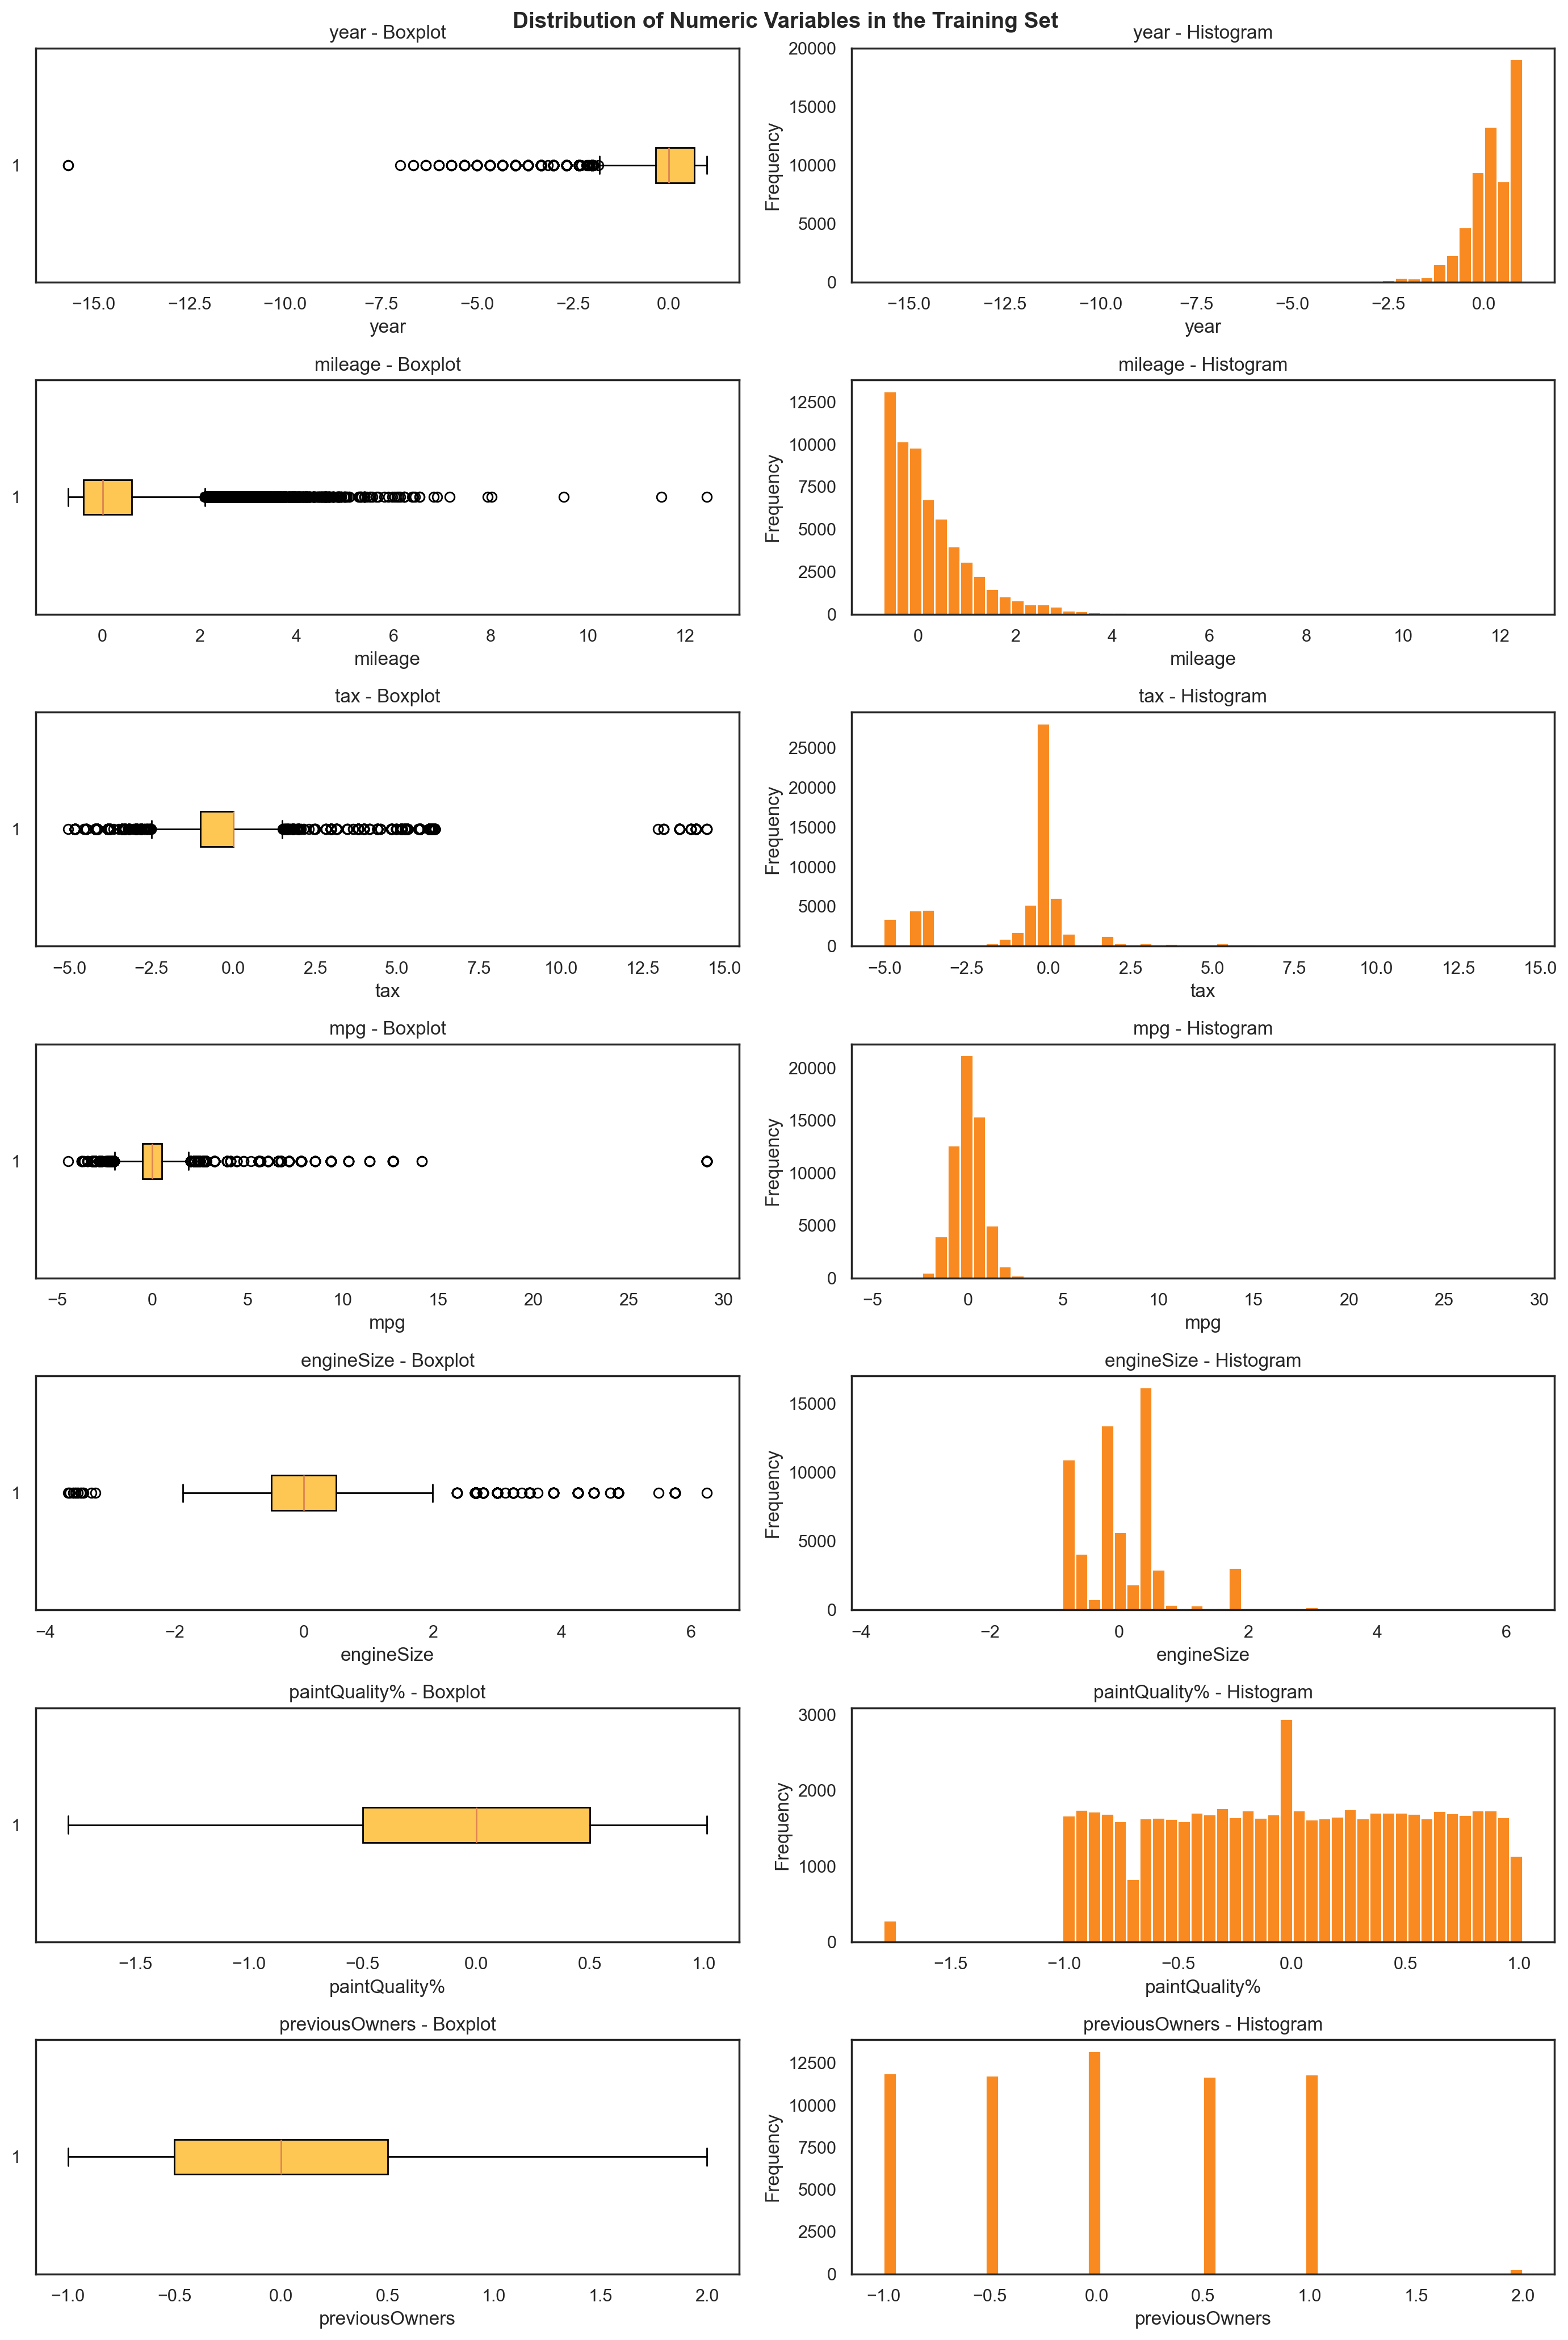

In [107]:
plot_box_hist(X_train, num_outliers, "in the Training Set")

In [108]:
# Get the indices of rows that are outliers by both IQR and MAD
indices_to_remove = indices_train['both']

# Calculate the impact of removing these rows
count_to_remove = len(indices_to_remove)
total_rows = len(X_train)
percentage_to_remove = (count_to_remove / total_rows) * 100 if total_rows > 0 else 0

print(f"\nIf we were to remove all rows identified as outliers by both the IQR and MAD methods:")
print(f"We would remove {count_to_remove} rows. This represents {percentage_to_remove:.2f}% of the entire dataset ({count_to_remove} out of {total_rows} rows).")


If we were to remove all rows identified as outliers by both the IQR and MAD methods:
We would remove 18683 rows. This represents 30.75% of the entire dataset (18683 out of 60763 rows).


In [109]:
def fit_keep_models_per_brand(train, brand_col="Brand", model_col="model",
                              min_count=20, min_freq=0.01):
    tmp = train[[brand_col, model_col]].copy()

    # Exclude 'unknown' entries
    tmp = tmp[~tmp[brand_col].isin(["unknown"])]
    tmp = tmp[~tmp[model_col].isin(["unknown"])]

    # Count combinations and calculate frequencies within each brand
    g = (tmp.groupby([brand_col, model_col], dropna=False)
           .size().rename("n").reset_index())
    g["brand_total"] = g.groupby(brand_col)["n"].transform("sum")
    g["freq"] = g["n"] / g["brand_total"]

    # Keep only sufficiently frequent combinations
    keep = g.loc[
        (g["n"] >= min_count) & (g["freq"] >= min_freq),
        [brand_col, model_col]
    ].copy()
    keep["keep"] = True

    return keep


def collapse_rare_models(df, keep_table, brand_col="Brand", model_col="model",
                         other_label="other"):
    # Save original index
    original_index = df.index

    out = df.copy()

    # Merge with keep_table (preserving all rows from df)
    out = out.merge(
        keep_table, how="left",
        on=[brand_col, model_col]
    )

    keep_mask = out["keep"].fillna(False)

    # Only replace rare models, skip if brand or model == 'unknown'
    mask_to_replace = (
        (~keep_mask) &
        (~out[brand_col].isin(["unknown", None, np.nan])) &
        (~out[model_col].isin(["unknown", None, np.nan]))
    )

    out.loc[mask_to_replace, model_col] = other_label

    # Restore original index
    out.index = original_index

    # Drop auxiliary column
    out = out.drop(columns=["keep"], errors="ignore")

    return out

In [110]:
keep_tbl = fit_keep_models_per_brand(X_train, "Brand", "model",
                                     min_count=20, min_freq=0.01)

# apply to datasets
X_train = collapse_rare_models(X_train, keep_tbl, "Brand", "model")

# Check results
s = X_train["model"].astype("string").str.strip().str.lower()
print("other count (train):", int(s.eq("other").sum()),
      f"({s.eq('other').mean()*100:.2f}%)")

other count (train): 1909 (3.14%)


Total number of outliers detected by LOF (Threshold < -1.5): 1675 (2.76%)
LOF Score < -2.0 (Extreme Outliers): 0.40%
LOF Score [-2.0, -1.5) (Mild Outliers): 2.36%
LOF Score [-1.5, -1.0) (Near Normal): 73.47%
LOF Score >= -1.0 (Normal): 23.77%


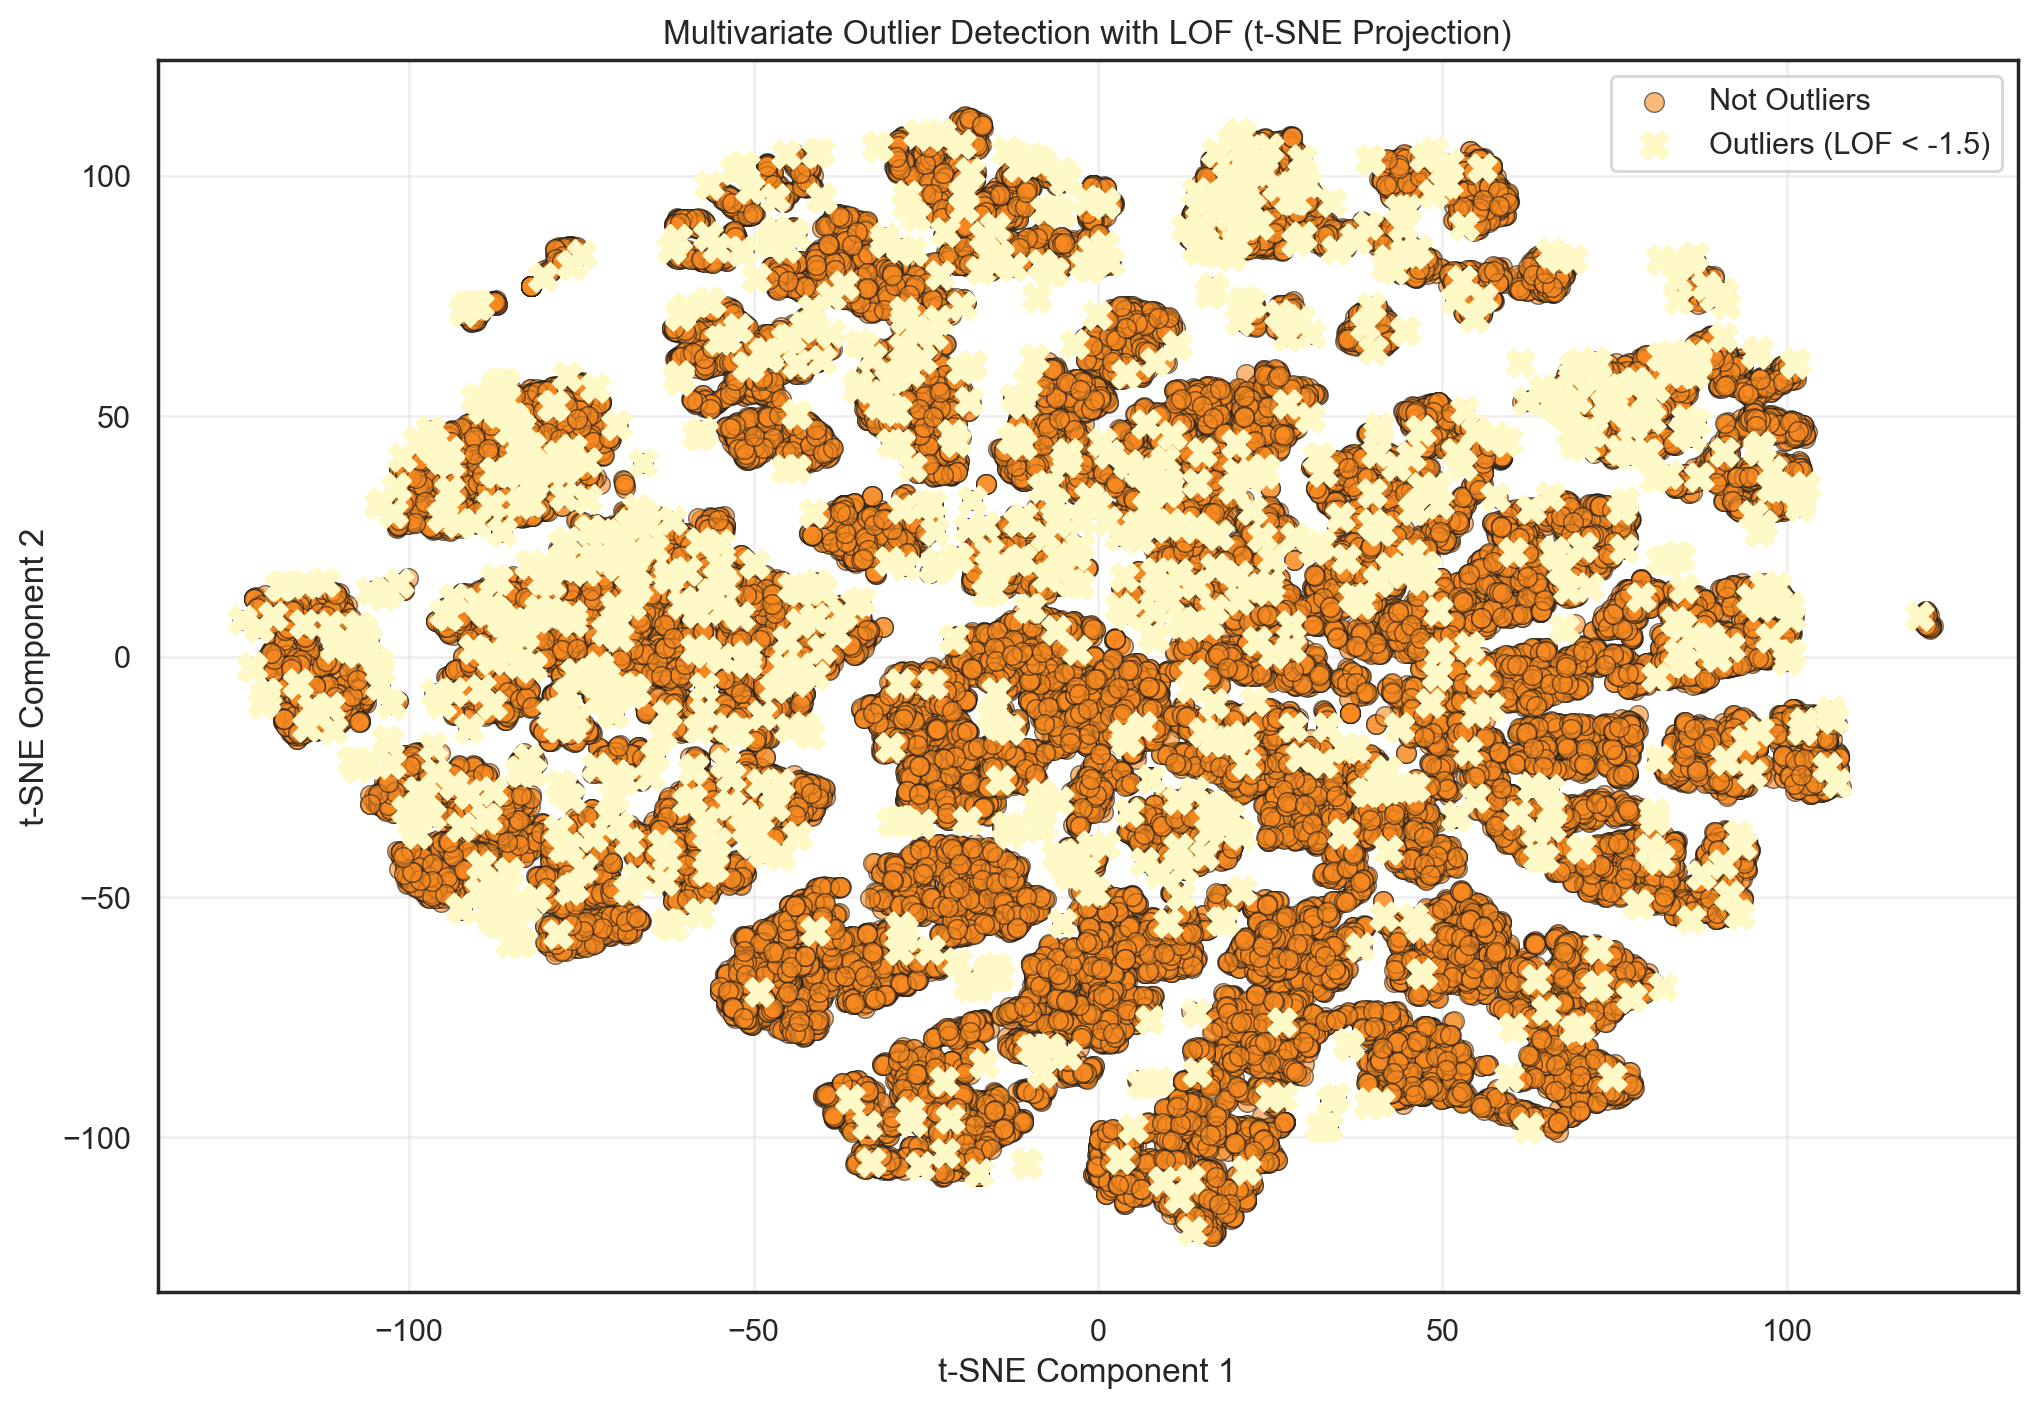

In [112]:
# use just the numeric columns (already scaled and imputed)
X_lof = X_train[numeric_cols].copy()

# apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.004)
lof.fit(X_lof)
lof_scores = lof.negative_outlier_factor_


# Define a threshold from LOF scores to classify outliers
threshold = -1.5 
outlier_indices_score = X_train.index[lof_scores < threshold]
print(f"Total number of outliers detected by LOF (Threshold < {threshold}): {len(outlier_indices_score)} ({len(outlier_indices_score) / len(X_train) * 100:.2f}%)") 

percent_extreme_outliers = (lof_scores < -2.0).sum() / len(lof_scores) * 100
percent_mild_outliers = ((lof_scores >= -2.0) & (lof_scores < -1.5)).sum() / len(lof_scores) * 100
percent_near_normal = ((lof_scores >= -1.5) & (lof_scores < -1.0)).sum() / len(lof_scores) * 100
percent_normal = (lof_scores >= -1.0).sum() / len(lof_scores) * 100
print(f"LOF Score < -2.0 (Extreme Outliers): {percent_extreme_outliers:.2f}%")
print(f"LOF Score [-2.0, -1.5) (Mild Outliers): {percent_mild_outliers:.2f}%")
print(f"LOF Score [-1.5, -1.0) (Near Normal): {percent_near_normal:.2f}%")
print(f"LOF Score >= -1.0 (Normal): {percent_normal:.2f}%")

# Reduce Dimensionality (t-SNE just for visualization)
X_lof_array = X_lof.values 

X_tsne = TSNE(n_components=2, 
              random_state=37, 
              perplexity=50,
              init='pca',
              n_jobs=-1).fit_transform(X_lof_array)

X_tsne = pd.DataFrame(X_tsne, index=X_lof.index, columns=['TSNE1', 'TSNE2'])

plt.figure(figsize=(12, 8))
inliers_tsne = X_tsne.loc[~X_tsne.index.isin(outlier_indices_score)]
plt.scatter(inliers_tsne['TSNE1'], inliers_tsne['TSNE2'], 
            color=palette[5], 
            s=50, 
            alpha=0.6,
            edgecolor='k',
            linewidth=0.5,
            label='Not Outliers')

# outliers given the threshold
outliers_tsne_score = X_tsne.loc[outlier_indices_score]
plt.scatter(outliers_tsne_score['TSNE1'], outliers_tsne_score['TSNE2'], 
            marker='X', 
            color=palette[0], 
            s=100, 
            label=f'Outliers (LOF < {threshold})', 
            zorder=2, 
            linewidths=1)

plt.title('Multivariate Outlier Detection with LOF (t-SNE Projection)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [113]:
X_train = X_train.drop(outlier_indices_score, axis=0)
y_train = y_train.drop(outlier_indices_score, axis=0)
print(f"Shape of X_train after removing LOF outliers: {X_train.shape}")

Shape of X_train after removing LOF outliers: (59088, 16)


In [114]:
# Inverse transform (back to original scale)
X_train[numeric_cols] = scaler.inverse_transform(X_train[numeric_cols])

# Round discrete variables to the nearest integer after imputation
for col in ['year', 'previousOwners']:
    X_train[col] = X_train[col].round().astype(int, errors='ignore')

<a id='7-features'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>7 | Feature Engineering</b></span>
    </h1>
</div>

### 7.1 Create New Features

#### _Brand Price Segments_

In [115]:
# Brand Price Segments (calculate stats from training set only to avoid data leakage)
y_price = y_train['price'].copy()

brand_stats = (
    X_train.join(y_price)
           .groupby('Brand')['price']
           .agg(['mean', 'median', 'std', 'count'])
           .round(2)
           .rename(columns={
               'mean': 'brand_mean_price',
               'median': 'brand_median_price',
               'std': 'brand_price_std',
               'count': 'brand_count'
           })
)

# Create brand segments based on mean price quantiles
p33, p67 = brand_stats['brand_mean_price'].quantile([0.33, 0.67])
brand_stats['brand_segment'] = pd.cut(
    brand_stats['brand_mean_price'],
    bins=[-np.inf, p33, p67, np.inf],
    labels=['budget', 'mid_range', 'luxury']
)

print("Brand Statistics:")
display(brand_stats.sort_values('brand_mean_price', ascending=False))

Brand Statistics:


brand_mean_price  brand_median_price  brand_price_std  brand_count  \
Brand                                                                          
mercedes          24554.45            22767.00         11212.52         9179   
audi              22848.12            20450.00         11486.43         5802   
bmw               22650.43            20000.00         11379.78         5852   
unknown           19139.07            17000.00         11131.42           27   
vw                16915.61            15910.50          7680.35         8318   
skoda             14266.05            12999.00          6191.22         3329   
hyundai           12827.79            11999.50          5915.57         2614   
ford              12558.78            11750.00          4705.09        12838   
toyota            12223.21            10550.00          6125.67         3669   
opel              10400.84             9999.00          3570.74         7460   

         brand_segment  
Brand                   
mercedes        luxury  
audi            luxury  
bmw             luxury  
unknown      mid_range  
vw           mid_range  
skoda        mid_range  
hyundai      mid_range  
ford            budget  
toyota          budget  
opel            budget

In [116]:
# Apply brand stats to ALL datasets (using training stats)
for df in [X_train, X_val, X_test]:
    # Join brand statistics
    for col in ['brand_mean_price', 'brand_median_price', 'brand_price_std', 'brand_count', 'brand_segment']:
        df[col] = df['Brand'].map(brand_stats[col])
    
    # Fill missing values for unseen brands with global means
    df['brand_mean_price'] = df['brand_mean_price'].fillna(brand_stats['brand_mean_price'].mean())
    df['brand_median_price'] = df['brand_median_price'].fillna(brand_stats['brand_median_price'].mean())
    df['brand_price_std'] = df['brand_price_std'].fillna(brand_stats['brand_price_std'].mean())
    df['brand_count'] = df['brand_count'].fillna(0)
    df['brand_segment'] = df['brand_segment'].fillna('mid_range')

print("✅ Brand price segments applied to all datasets")

✅ Brand price segments applied to all datasets


#### _Age and Mileage Features_

In [117]:
# Calculate quantiles from training set only
q25_mileage = X_train['mileage'].quantile(0.25)
q75_mileage = X_train['mileage'].quantile(0.75)

# Model popularity from training set
model_counts = X_train['model'].value_counts()

print(f"Mileage Q25: {q25_mileage:.0f}, Q75: {q75_mileage:.0f}")
print(f"Unique models in training: {len(model_counts)}")

Mileage Q25: 7778, Q75: 32064
Unique models in training: 106


In [118]:
# Apply age and mileage features to ALL datasets
for df in [X_train, X_val, X_test]:
    # Age features (dataset is from 2020)
    # Ensure year is numeric first
    df["year"] = pd.to_numeric(df["year"], errors="coerce")
    df["age"] = (2020 - df["year"]).round().astype("Int64")
    df["age_squared"] = df["age"] ** 2
    df['is_new_car'] = (df['age'] <= 1).astype(int)
    df['is_old_car'] = (df['age'] >= 10).astype(int)
    
    # Mileage features (using training quantiles)
    df['miles_per_year'] = df['mileage'] / (df['age'] + 1)  # +1 to avoid division by zero
    df['high_mileage'] = (df['mileage'] > q75_mileage).astype(int)
    df['low_mileage'] = (df['mileage'] < q25_mileage).astype(int)
    
    # Depreciation interaction
    df['age_mileage_interaction'] = df['age'] * df['mileage']

print("✅ Age and mileage features applied to all datasets")

✅ Age and mileage features applied to all datasets


#### _Engine and Efficiency Features_

In [119]:
# Apply engine and efficiency features to ALL datasets
for df in [X_train, X_val, X_test]:
    # Premium brand x engine size interaction
    df['premium_brand_engine_size_interaction'] = (
        (df['brand_segment'] == 'luxury').astype(int) * df['engineSize']
    )
    
    # Tax efficiency
    df['tax_per_engine'] = df['tax'] / (df['engineSize'] + 0.1)
    
    # Fuel efficiency per engine size
    df['mpg_per_liter'] = df['mpg'] / (df['engineSize'] + 0.1)

print("✅ Engine and efficiency features applied to all datasets")

✅ Engine and efficiency features applied to all datasets


#### _Categorical Combinations_

In [120]:
# Apply categorical combinations to ALL datasets
for df in [X_train, X_val, X_test]:
    # Brand-model combination
    df['brand_model'] = df['Brand'] + '_' + df['model']
    
    # Model popularity (using training counts, 0 for unseen models)
    df['model_popularity'] = df['model'].map(model_counts).fillna(0).astype(int)

print(f"Unique brand_model combinations in training: {X_train['brand_model'].nunique()}")
print("✅ Categorical combinations applied to all datasets")

Unique brand_model combinations in training: 123
✅ Categorical combinations applied to all datasets


### 7.3 Test Feature Independence

In [121]:
# Test independence of categorical variables
def test_independence(X_1, X_2, alpha=0.05):
    data = pd.concat([X_1, X_2], axis=1).dropna()
    table = pd.crosstab(data.iloc[:, 0], data.iloc[:, 1])
    _, p, _, _ = stats.chi2_contingency(table.values)
    
    if p < alpha:
        return f"{X_1.name} ↔ {X_2.name}: DEPENDENT (p={p:.4f})"
    return f"{X_1.name} ↔ {X_2.name}: INDEPENDENT (p={p:.4f})"

X_train_cat = X_train.select_dtypes(exclude='number').copy()
X_train_cat['hasDamage'] = X_train['hasDamage']

for x1, x2 in combinations(X_train_cat.columns, 2):
    print(test_independence(X_train_cat[x1], X_train_cat[x2]))

Brand ↔ model: DEPENDENT (p=0.0000)
Brand ↔ transmission: DEPENDENT (p=0.0000)
Brand ↔ fuelType: DEPENDENT (p=0.0000)
Brand ↔ brand_segment: DEPENDENT (p=0.0000)
Brand ↔ brand_model: DEPENDENT (p=0.0000)
Brand ↔ hasDamage: INDEPENDENT (p=1.0000)
model ↔ transmission: DEPENDENT (p=0.0000)
model ↔ fuelType: DEPENDENT (p=0.0000)
model ↔ brand_segment: DEPENDENT (p=0.0000)
model ↔ brand_model: DEPENDENT (p=0.0000)
model ↔ hasDamage: INDEPENDENT (p=1.0000)
transmission ↔ fuelType: DEPENDENT (p=0.0000)
transmission ↔ brand_segment: DEPENDENT (p=0.0000)
transmission ↔ brand_model: DEPENDENT (p=0.0000)
transmission ↔ hasDamage: INDEPENDENT (p=1.0000)
fuelType ↔ brand_segment: DEPENDENT (p=0.0000)
fuelType ↔ brand_model: DEPENDENT (p=0.0000)
fuelType ↔ hasDamage: INDEPENDENT (p=1.0000)
brand_segment ↔ brand_model: DEPENDENT (p=0.0000)
brand_segment ↔ hasDamage: INDEPENDENT (p=1.0000)
brand_model ↔ hasDamage: INDEPENDENT (p=1.0000)


In [122]:
# Drop redundant columns
for d in [X_train, X_val, X_test]:
    d.drop(columns=['model', 'year'], errors='ignore', inplace=True)

print(f"Features after engineering: {X_train.shape[1]}")
print(f"Columns: {X_train.columns.tolist()}")

Features after engineering: 32
Columns: ['Brand', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage', 'mpg_is_missing', 'tax_is_missing', 'engineSize_is_missing', 'year_is_missing', 'brand_mean_price', 'brand_median_price', 'brand_price_std', 'brand_count', 'brand_segment', 'age', 'age_squared', 'is_new_car', 'is_old_car', 'miles_per_year', 'high_mileage', 'low_mileage', 'age_mileage_interaction', 'premium_brand_engine_size_interaction', 'tax_per_engine', 'mpg_per_liter', 'brand_model', 'model_popularity']


<a id='8-encoding'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>8 | Encoding & Scaling</b></span>
    </h1>
</div>

### 8.1 Target Encoding (High Cardinality)

In [124]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Separate high and low cardinality
high_cardinality_cols = ['Brand','brand_model']
low_cardinality_cols = [c for c in categorical_cols if c not in high_cardinality_cols]

Categorical columns: ['Brand', 'transmission', 'fuelType', 'brand_segment', 'brand_model']


In [127]:
# Target encoding for high-cardinality columns (captures price relationship)
# This is much more predictive than frequency encoding for price prediction
X_train_processed = X_train.copy()
X_val_processed = X_val.copy()
X_test_processed = X_test.copy()

# Initialize TargetEncoder with smoothing to prevent overfitting
target_encoder = TargetEncoder(smooth='auto', target_type='continuous')

# Fit on training data only
target_encoder.fit(X_train[high_cardinality_cols], y_train)

# Transform all datasets
train_encoded = target_encoder.transform(X_train[high_cardinality_cols])
val_encoded = target_encoder.transform(X_val[high_cardinality_cols])
test_encoded = target_encoder.transform(X_test[high_cardinality_cols])

# Add target encoded columns
for i, col in enumerate(high_cardinality_cols):
    new_col = f'{col}_target_enc'
    X_train_processed[new_col] = train_encoded[:, i]
    X_val_processed[new_col] = val_encoded[:, i]
    X_test_processed[new_col] = test_encoded[:, i]

# Also add frequency encoding as secondary feature (captures popularity)
for col in high_cardinality_cols:
    freq_map = X_train[col].value_counts(normalize=True).to_dict()
    new_col = f'{col}_freq_enc'
    X_train_processed[new_col] = X_train[col].map(freq_map)
    X_val_processed[new_col] = X_val[col].apply(lambda x: freq_map.get(x, 0))
    X_test_processed[new_col] = X_test[col].apply(lambda x: freq_map.get(x, 0))

# Drop original categorical columns
for df in [X_train_processed, X_val_processed, X_test_processed]:
    df.drop(columns=high_cardinality_cols, inplace=True, errors='ignore')

print("✅ Target encoding applied (primary) + Frequency encoding (secondary)")
print(f"   Brand_target_enc captures mean price per brand")
print(f"   brand_model_target_enc captures mean price per model")

c:\Users\Utilizador\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


✅ Target encoding applied (primary) + Frequency encoding (secondary)
   Brand_target_enc captures mean price per brand
   brand_model_target_enc captures mean price per model


### 8.2 One-Hot Encoding (Low Cardinality)

In [128]:
# One-hot encoding for low-cardinality columns
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ohe.fit(X_train[low_cardinality_cols])

ohe_train = pd.DataFrame(ohe.transform(X_train[low_cardinality_cols]), 
                         columns=ohe.get_feature_names_out(), index=X_train.index)
ohe_val = pd.DataFrame(ohe.transform(X_val[low_cardinality_cols]), 
                       columns=ohe.get_feature_names_out(), index=X_val.index)
ohe_test = pd.DataFrame(ohe.transform(X_test[low_cardinality_cols]), 
                        columns=ohe.get_feature_names_out(), index=X_test.index)

for df in [X_train_processed, X_val_processed, X_test_processed]:
    df.drop(columns=low_cardinality_cols, inplace=True, errors='ignore')

X_train_final = pd.concat([X_train_processed, ohe_train], axis=1)
X_val_final = pd.concat([X_val_processed, ohe_val], axis=1)
X_test_final = pd.concat([X_test_processed, ohe_test], axis=1)

print(f"Shape after encoding: {X_train_final.shape}")

Shape after encoding: (59088, 42)


### 8.4 Final Scaling (PowerTransformer)

In [129]:
# Apply PowerTransformer for final scaling
pt_scaler = PowerTransformer()

X_train_final = pd.DataFrame(
    pt_scaler.fit_transform(X_train_final), 
    columns=X_train_final.columns, 
    index=X_train_final.index
)
X_val_final = pd.DataFrame(
    pt_scaler.transform(X_val_final), 
    columns=X_val_final.columns, 
    index=X_val_final.index
)
X_test_final = pd.DataFrame(
    pt_scaler.transform(X_test_final), 
    columns=X_test_final.columns, 
    index=X_test_final.index
)

print("✅ PowerTransformer applied")
print(f"\nFinal features: {X_train_final.columns.tolist()}")

✅ PowerTransformer applied

Final features: ['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage', 'mpg_is_missing', 'tax_is_missing', 'engineSize_is_missing', 'year_is_missing', 'brand_mean_price', 'brand_median_price', 'brand_price_std', 'brand_count', 'age', 'age_squared', 'is_new_car', 'is_old_car', 'miles_per_year', 'high_mileage', 'low_mileage', 'age_mileage_interaction', 'premium_brand_engine_size_interaction', 'tax_per_engine', 'mpg_per_liter', 'model_popularity', 'Brand_target_enc', 'brand_model_target_enc', 'Brand_freq_enc', 'brand_model_freq_enc', 'transmission_manual', 'transmission_other', 'transmission_semi auto', 'transmission_unknown', 'fuelType_electric', 'fuelType_hybrid', 'fuelType_other', 'fuelType_petrol', 'fuelType_unknown', 'brand_segment_luxury', 'brand_segment_mid_range']


<a id='9-export'></a>
<div style="background-color:#644712c5; padding:15px; border-radius:10px; box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>9 | Export Preprocessed Data</b></span>
    </h1>
</div>

In [130]:
# Reset index for export
X_train_export = X_train_final.reset_index()
X_val_export = X_val_final.reset_index()
X_test_export = X_test_final.reset_index()
y_train_export = y_train.reset_index()
y_val_export = y_val.reset_index()

# Save to parquet
X_train_export.to_parquet("./project_data/X_train_scaled.parquet", engine="pyarrow", index=False)
X_val_export.to_parquet("./project_data/X_val_scaled.parquet", engine="pyarrow", index=False)
X_test_export.to_parquet("./project_data/X_test_scaled.parquet", engine="pyarrow", index=False)
y_train_export.to_parquet("./project_data/y_train.parquet", engine="pyarrow", index=False)
y_val_export.to_parquet("./project_data/y_val.parquet", engine="pyarrow", index=False)

# Also save the brand_model dictionary
brand_model_dic_norm.to_parquet("./project_data/brand_model_dic.parquet", engine="pyarrow", index=False)

print("✅ All datasets exported successfully!")
print(f"\nExported files:")
print(f"  - X_train_final.parquet: {X_train_export.shape}")
print(f"  - X_val_final.parquet: {X_val_export.shape}")
print(f"  - X_test_final.parquet: {X_test_export.shape}")
print(f"  - y_train.parquet: {y_train_export.shape}")
print(f"  - y_val.parquet: {y_val_export.shape}")

✅ All datasets exported successfully!

Exported files:
  - X_train_final.parquet: (59088, 43)
  - X_val_final.parquet: (15193, 43)
  - X_test_final.parquet: (32567, 43)
  - y_train.parquet: (59088, 2)
  - y_val.parquet: (15193, 2)
